In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("final_data_set.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0
1,53,1,0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0
4,62,0,0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0


In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7695 entries, 0 to 8364
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       7695 non-null   int64  
 1   sex       7695 non-null   int64  
 2   cp        7695 non-null   int64  
 3   trestbps  7695 non-null   float64
 4   chol      7695 non-null   float64
 5   fbs       7695 non-null   float64
 6   restecg   7695 non-null   float64
 7   thalach   7695 non-null   float64
 8   exang     7695 non-null   float64
 9   oldpeak   7695 non-null   float64
 10  slope     7695 non-null   float64
 11  ca        7695 non-null   float64
 12  thal      7695 non-null   float64
 13  target    7695 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 901.8 KB


In [11]:
import plotly.express as px


In [12]:
fig=px.pie(data,values="chol",names="sex")
fig.show()

In [13]:
fig=px.pie(data,values="cp",names="slope")
fig.show()

In [15]:
def get_col_datatype(data):
  for col in data.columns:
    unique_vals=data[col].nunique()
    data_type=data[col].dtypes
    if unique_vals<=10 or data_type =="bool":
      print(f"{col}:categorical")
    else:
      print(f"{col}:numerical")
get_col_datatype(data)

age:numerical
sex:categorical
cp:categorical
trestbps:numerical
chol:numerical
fbs:categorical
restecg:categorical
thalach:numerical
exang:categorical
oldpeak:numerical
slope:categorical
ca:categorical
thal:categorical
target:categorical


In [16]:
fig=px.scatter(data.age,data.trestbps)
fig.show()

In [19]:
fig=px.scatter(data,x="slope",y="cp")
fig.show()

In [22]:
def plot_scatter(data):
  numeric_cols=['age','trestbps','chol','thalach','oldpeak']
  
  for i,col1 in enumerate(numeric_cols):
    for j,col2 in enumerate(numeric_cols):
      if i<j:
        fig,ax =plt.subplots(figsize=(10,8))
        ax.scatter(data[col1],data[col2],marker=".")
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(f"{col1} vs {col2}")
        plt.show()

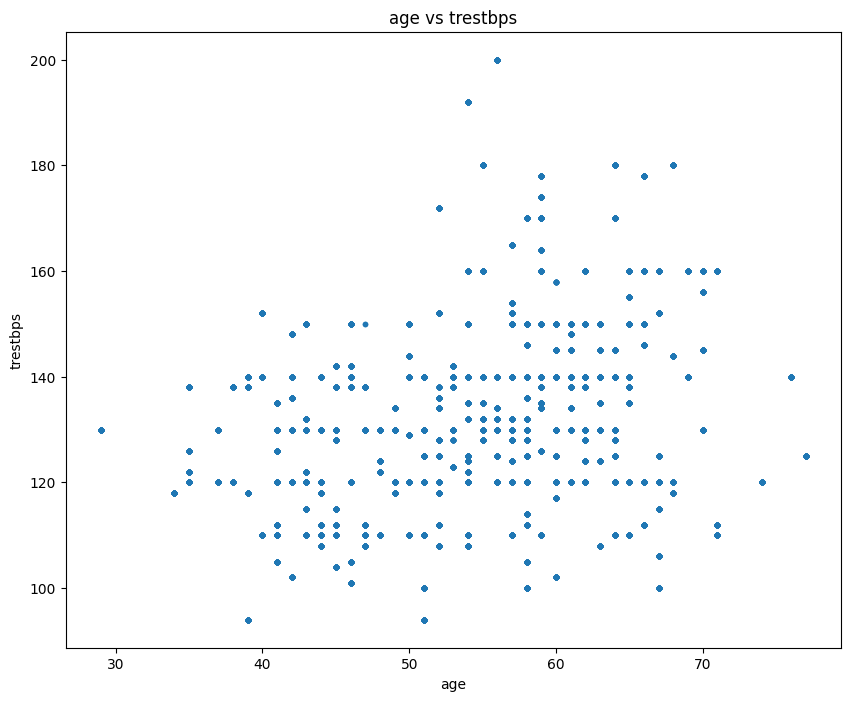

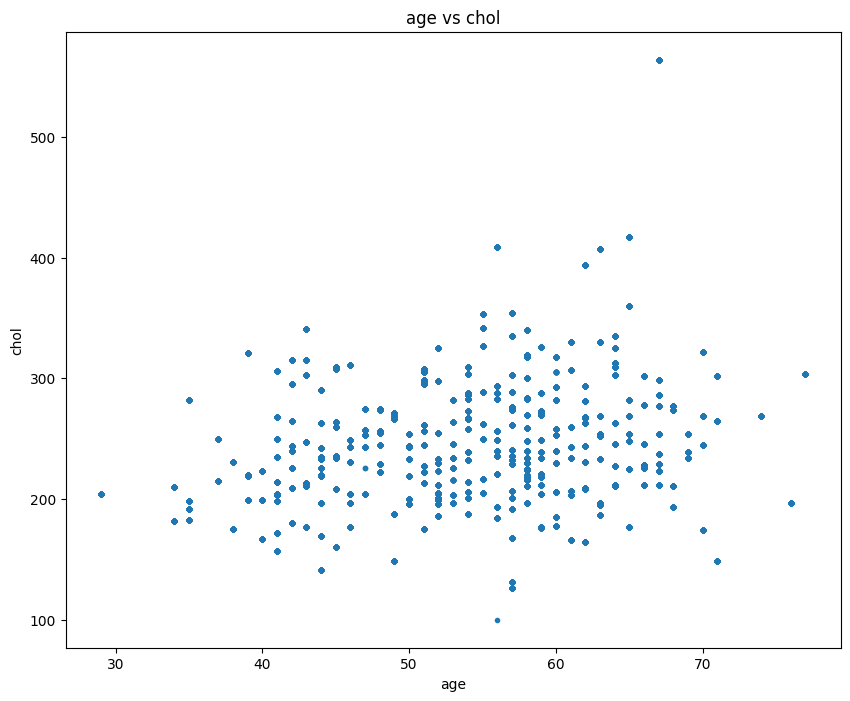

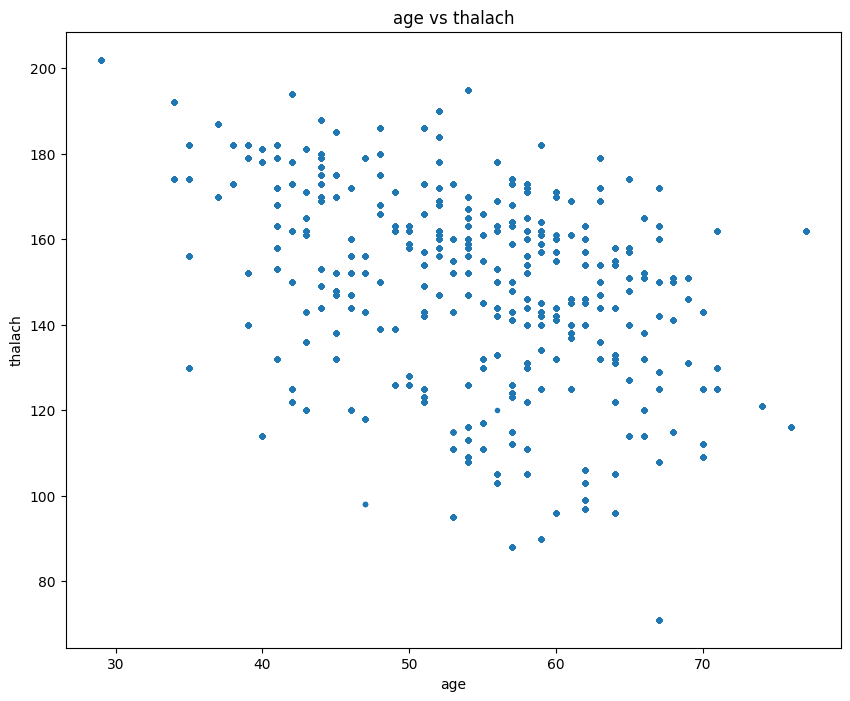

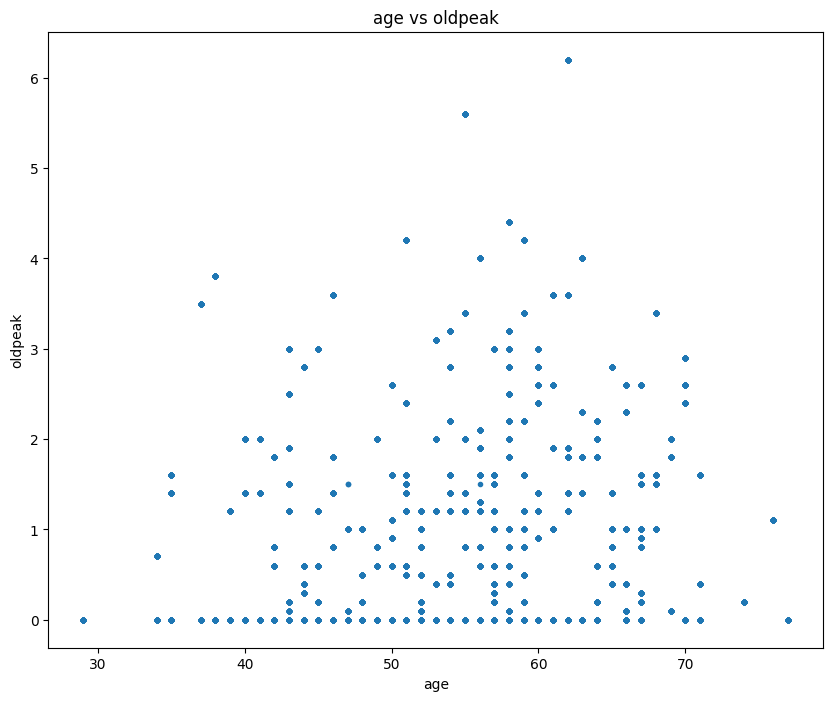

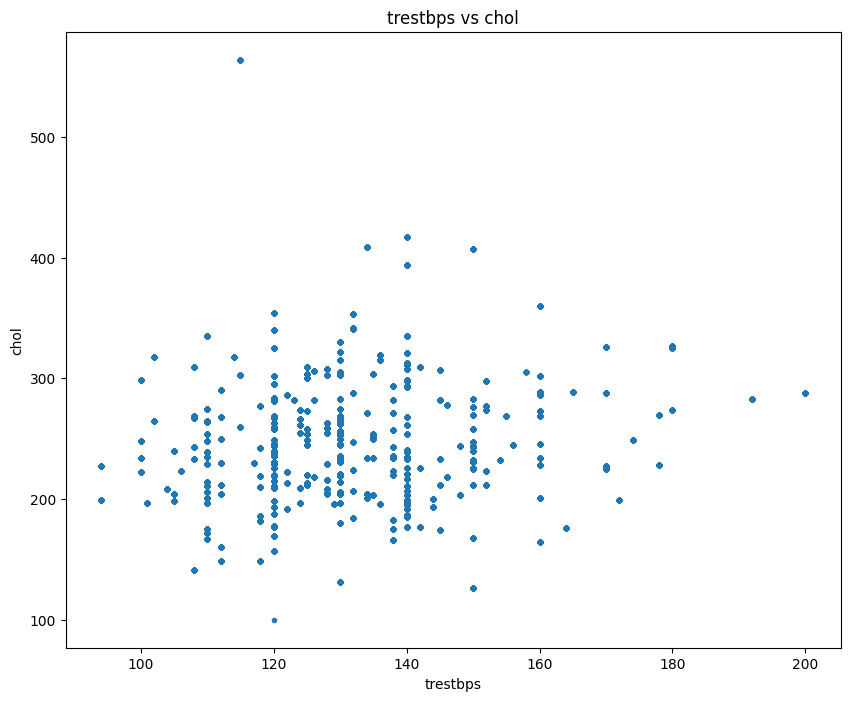

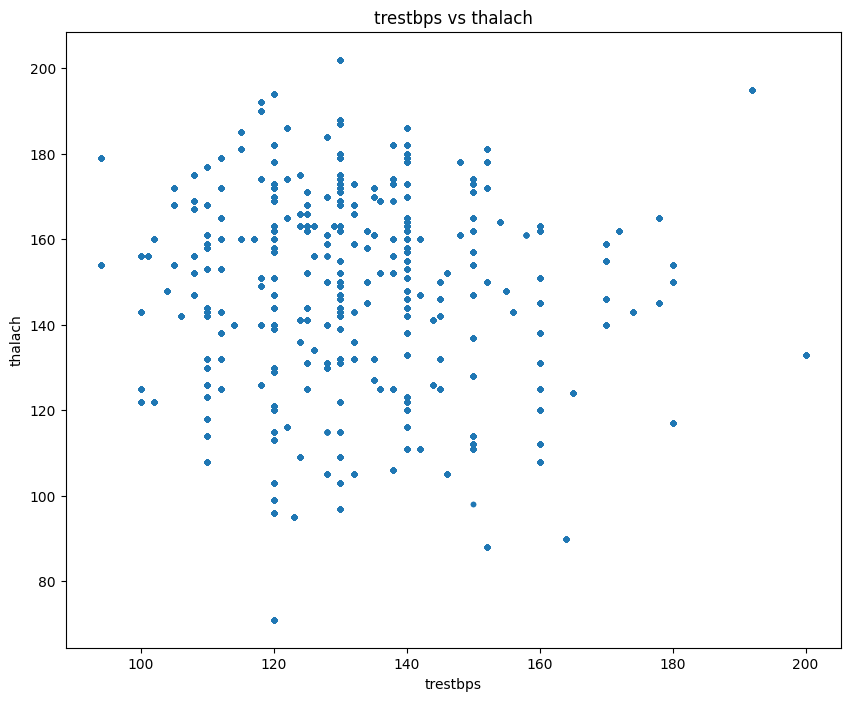

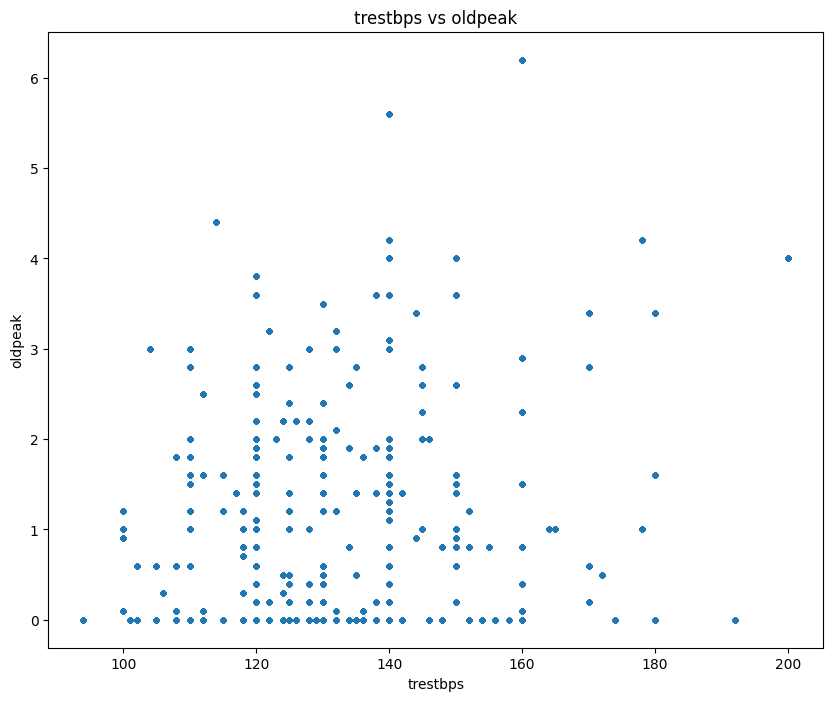

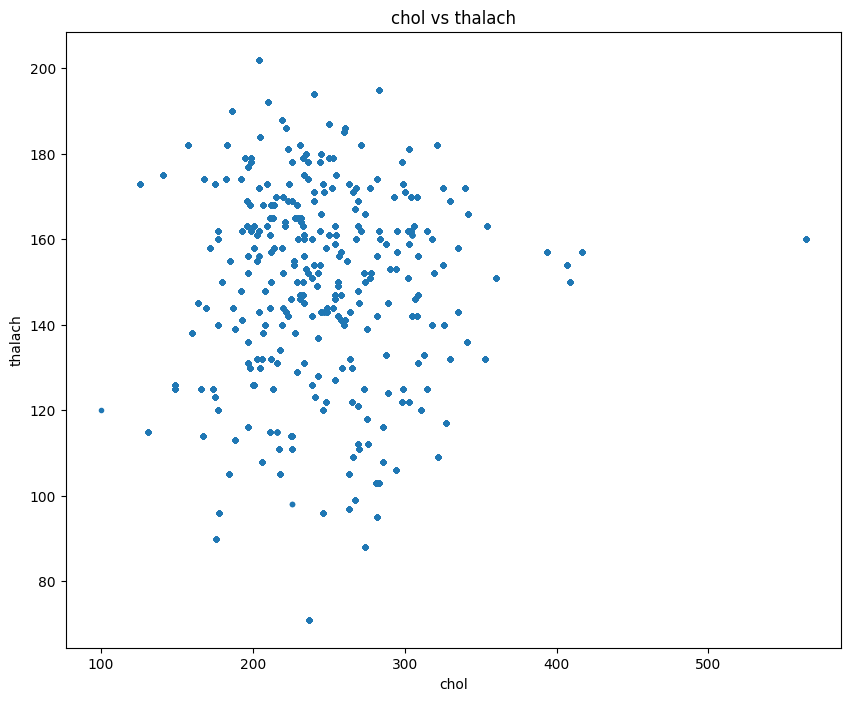

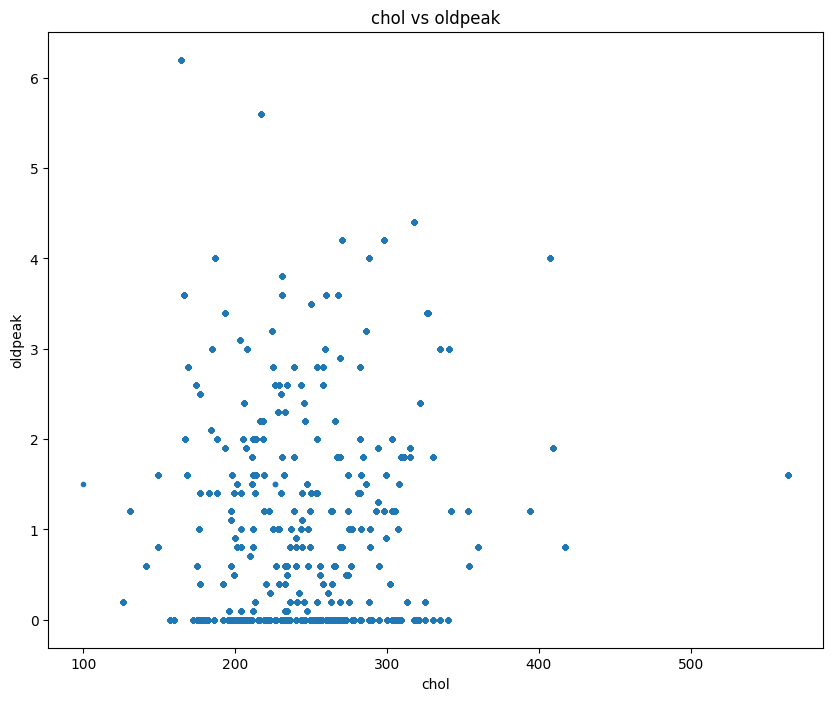

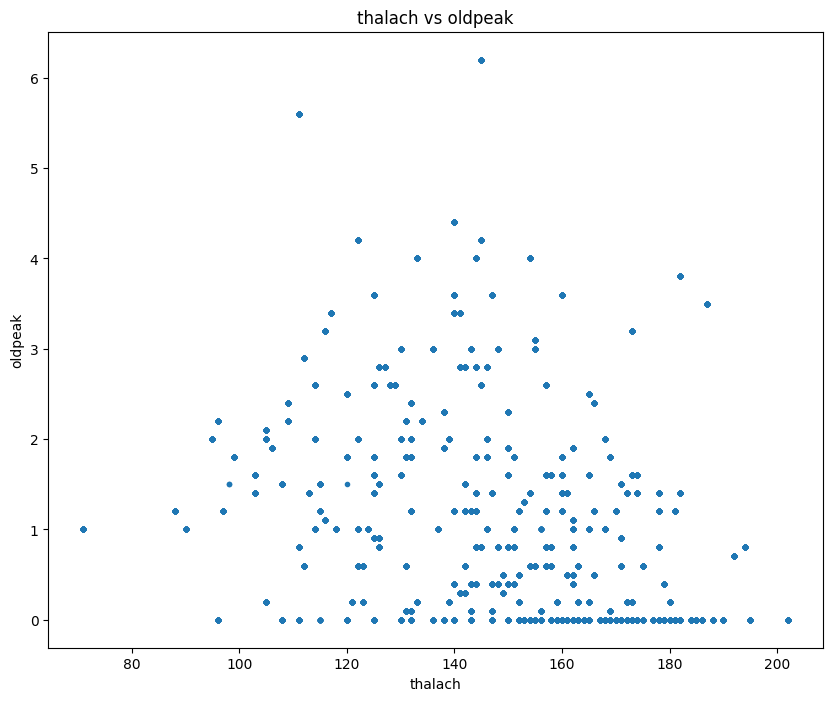

In [23]:
plot_scatter(data)

In [26]:
# bar graph for all categorical values
def plot_bar(data):
  numeric_cols=['sex','cp','fbs','restecg','slope','ca','thal','target']
  
  for i,col1 in enumerate(numeric_cols):
    for j,col2 in enumerate(numeric_cols):
      if i<j:
        fig,ax =plt.subplots(figsize=(10,8))
        ax.bar(data[col1],data[col2])
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(f"{col1} vs {col2}")
        plt.show()

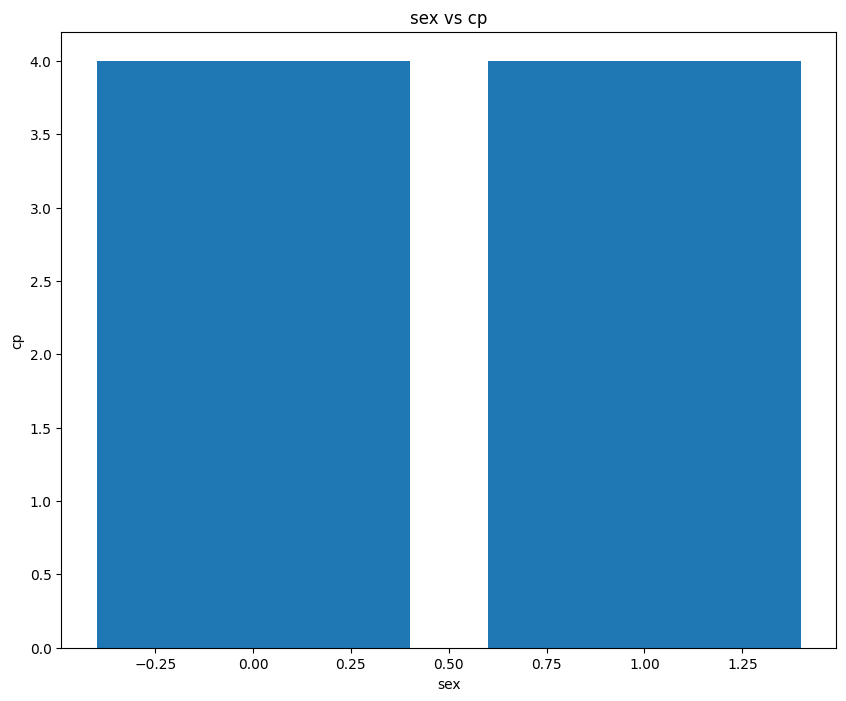

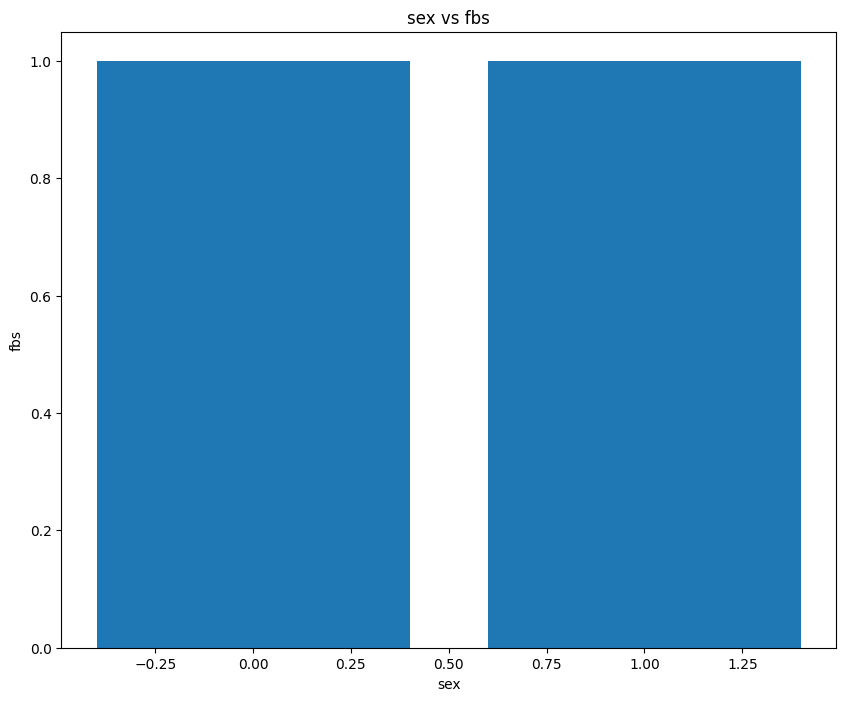

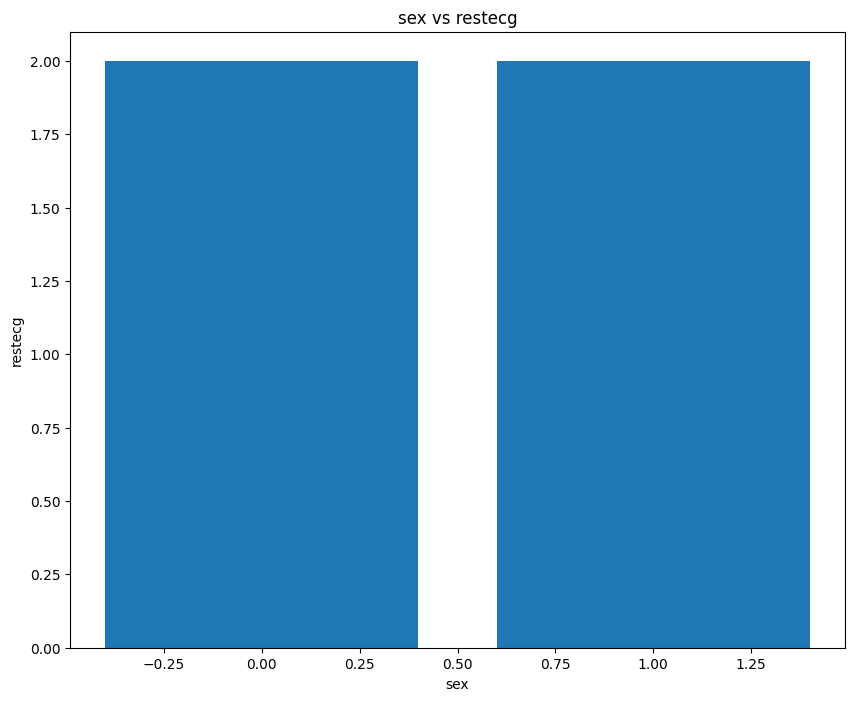

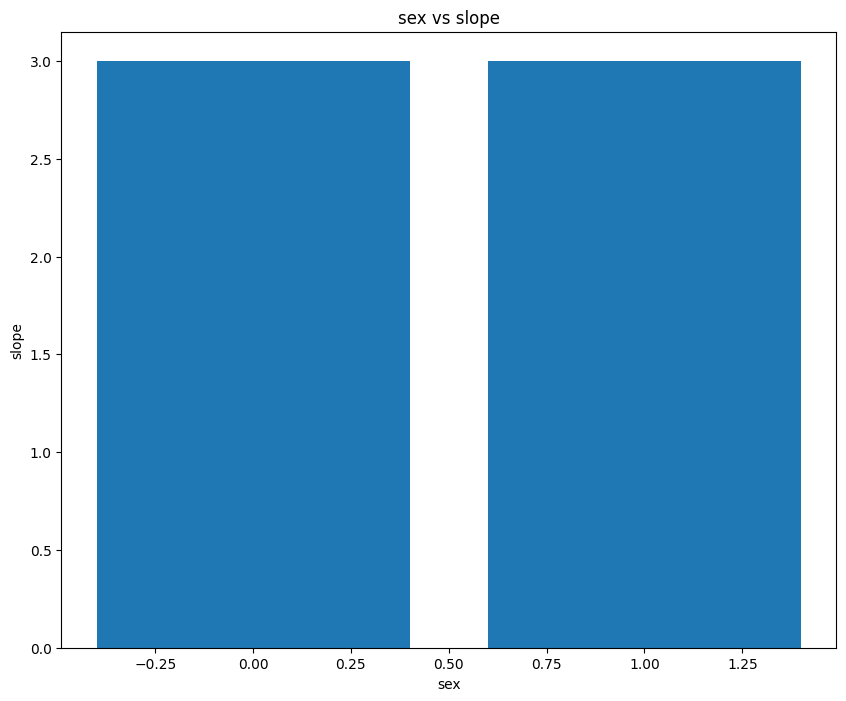

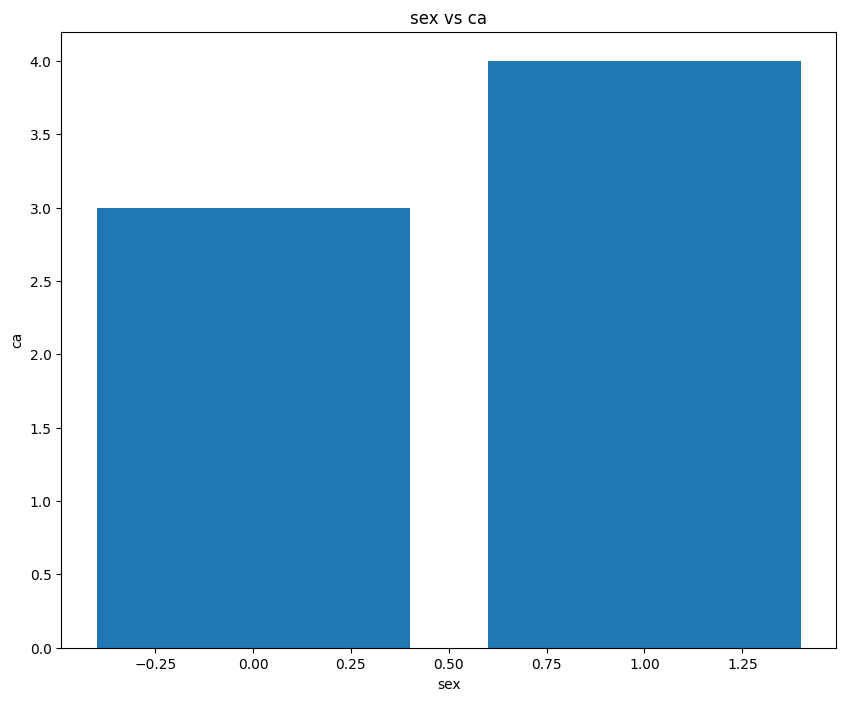

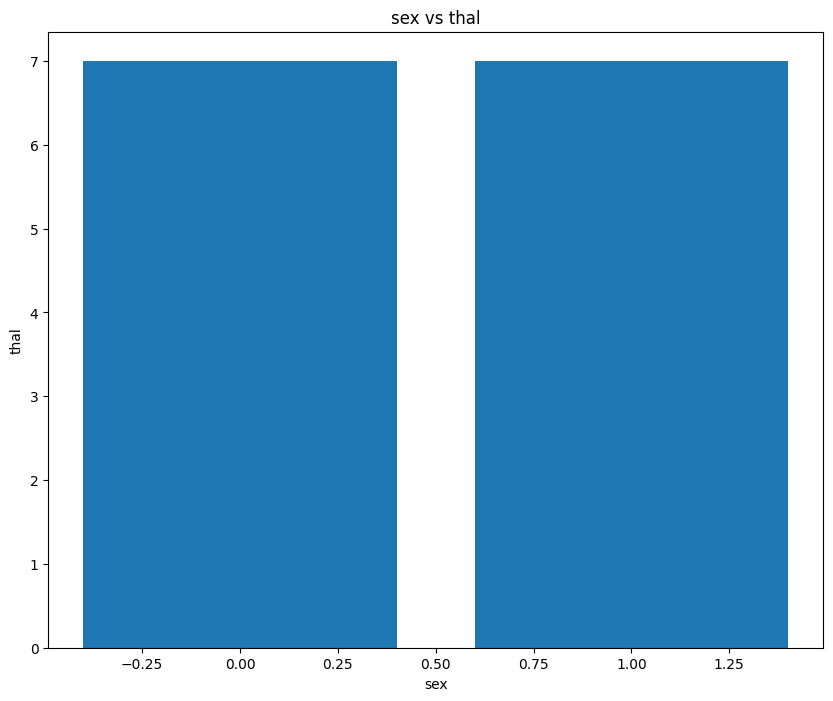

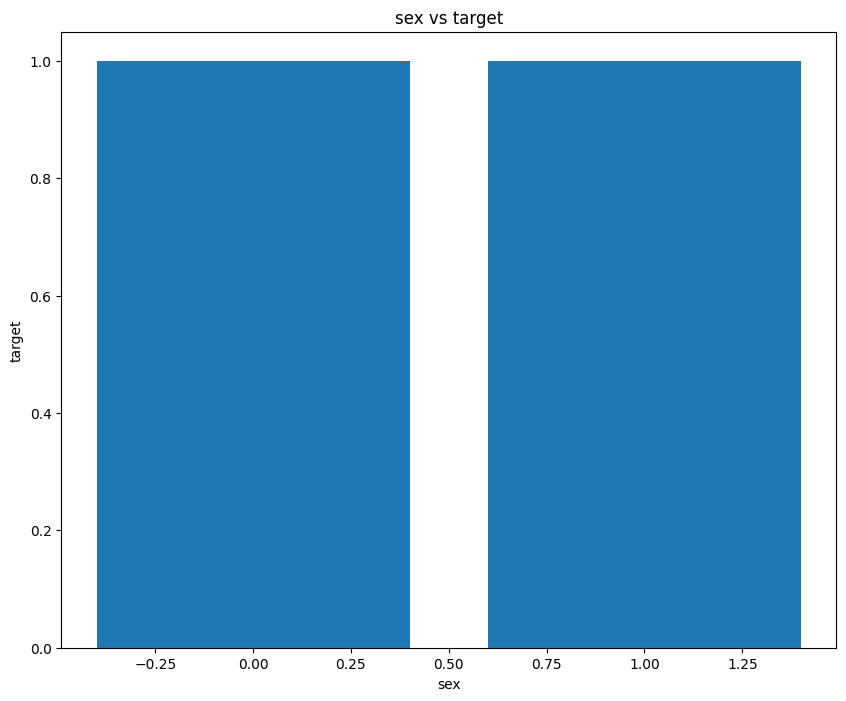

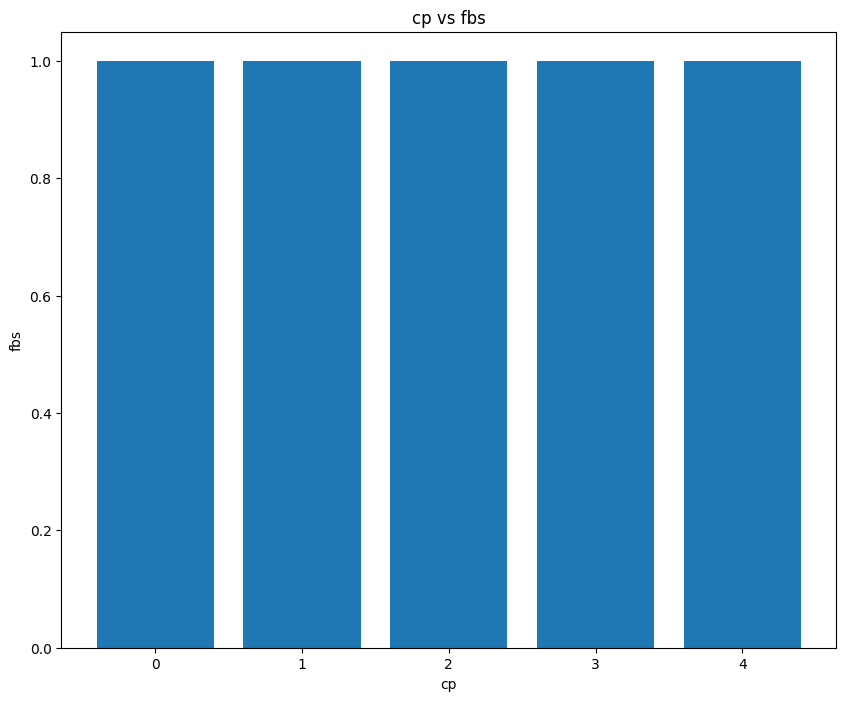

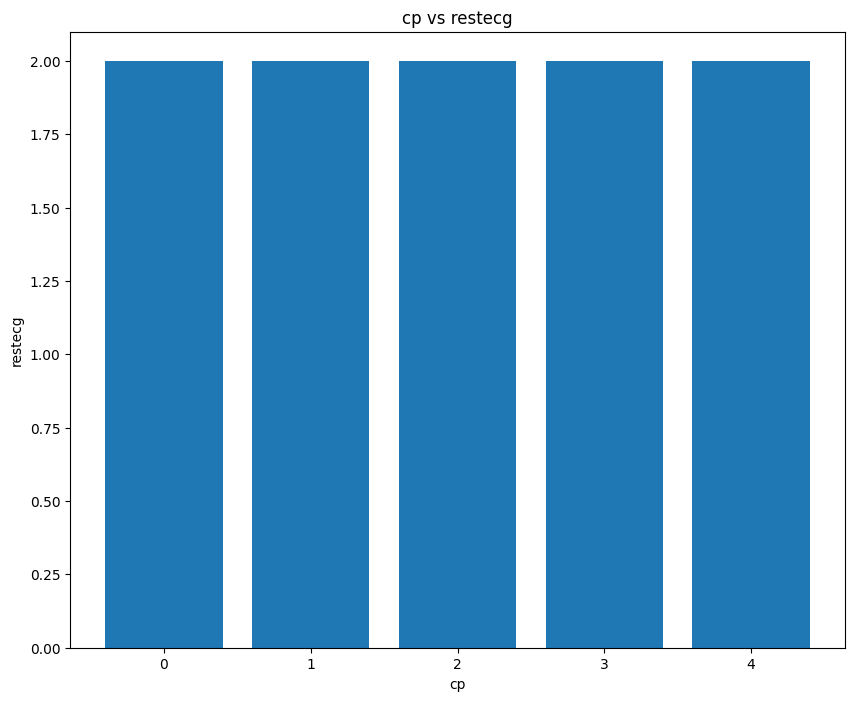

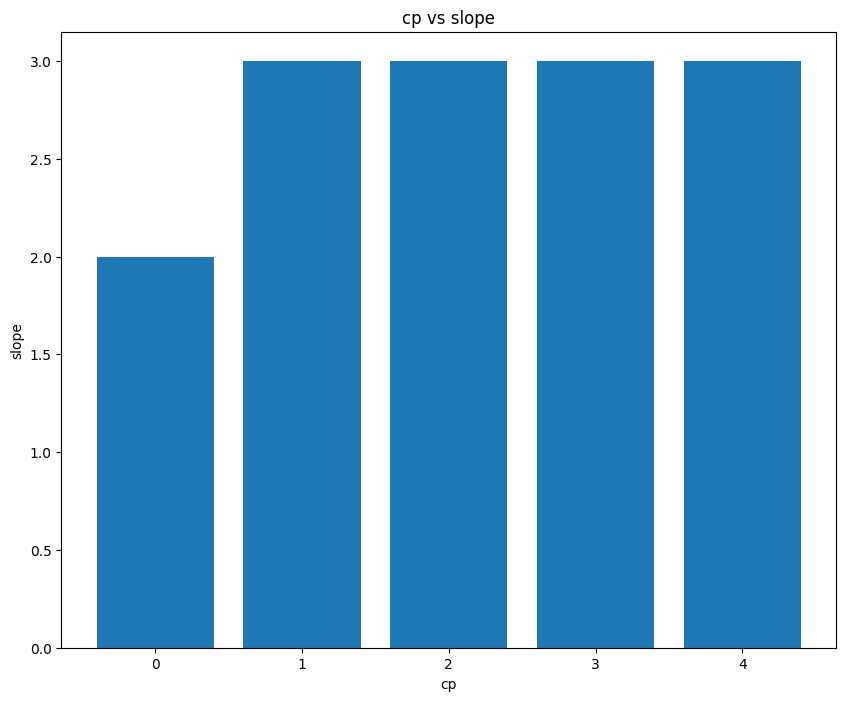

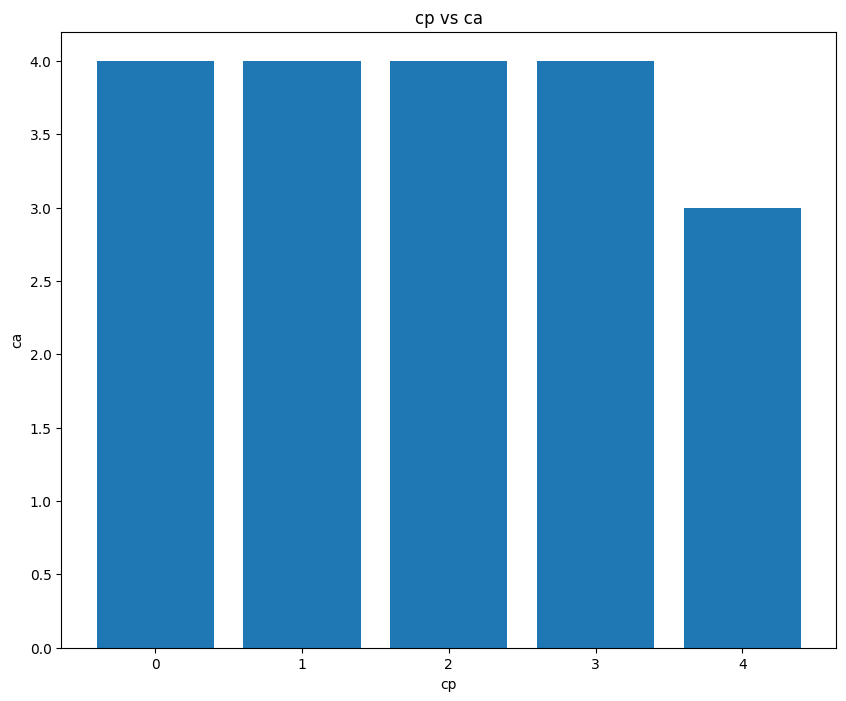

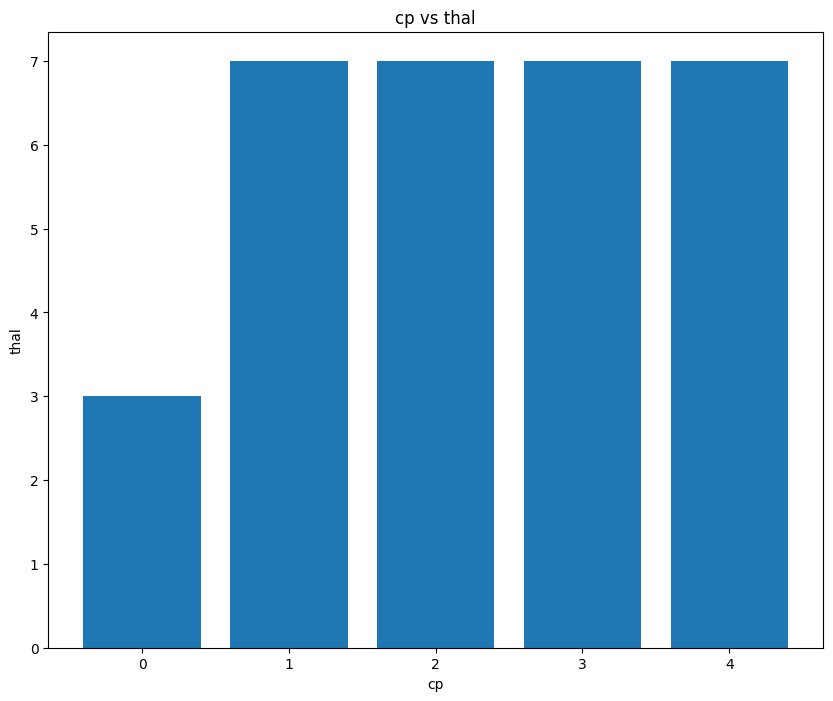

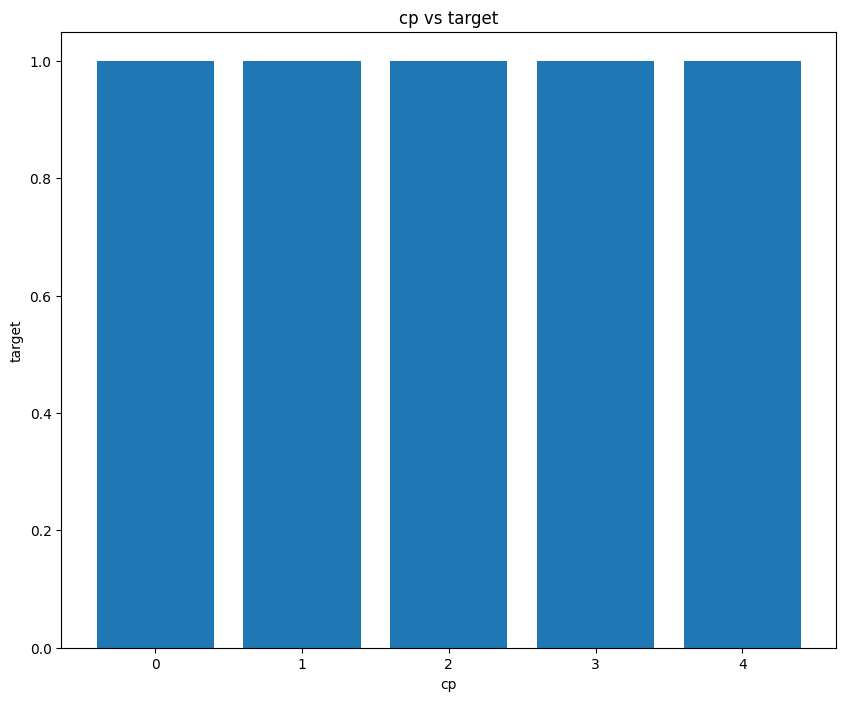

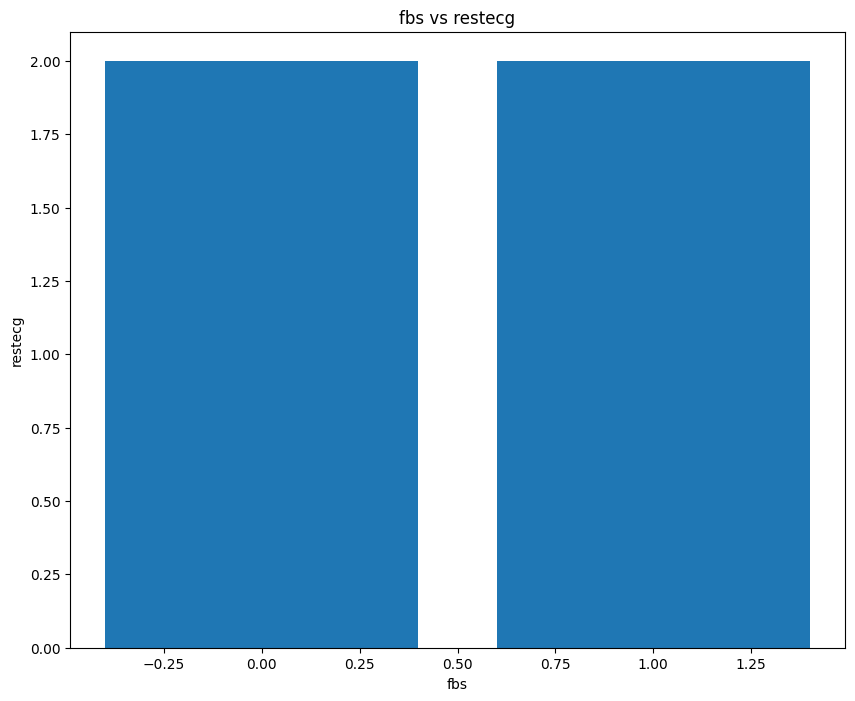

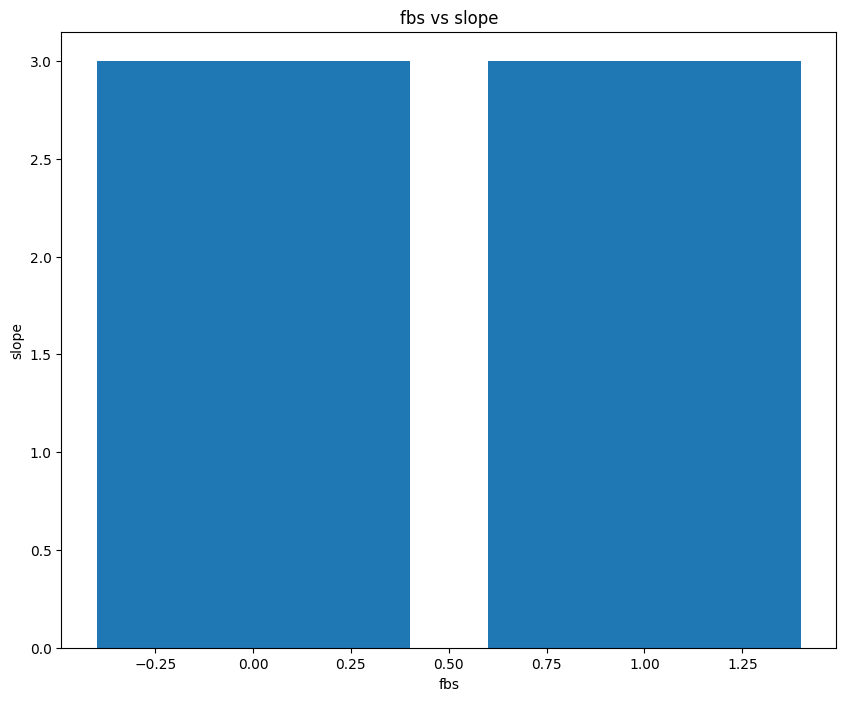

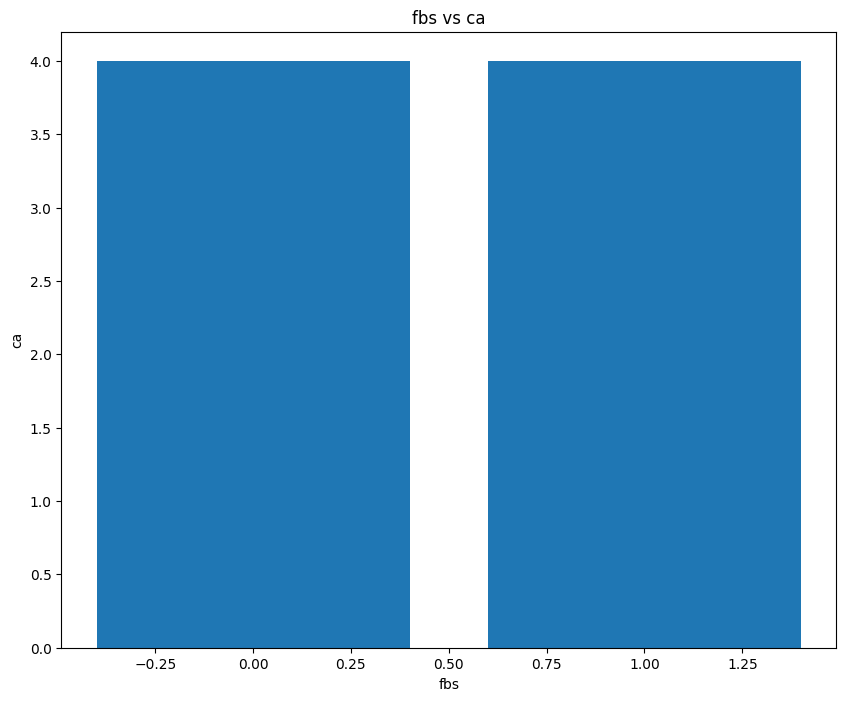

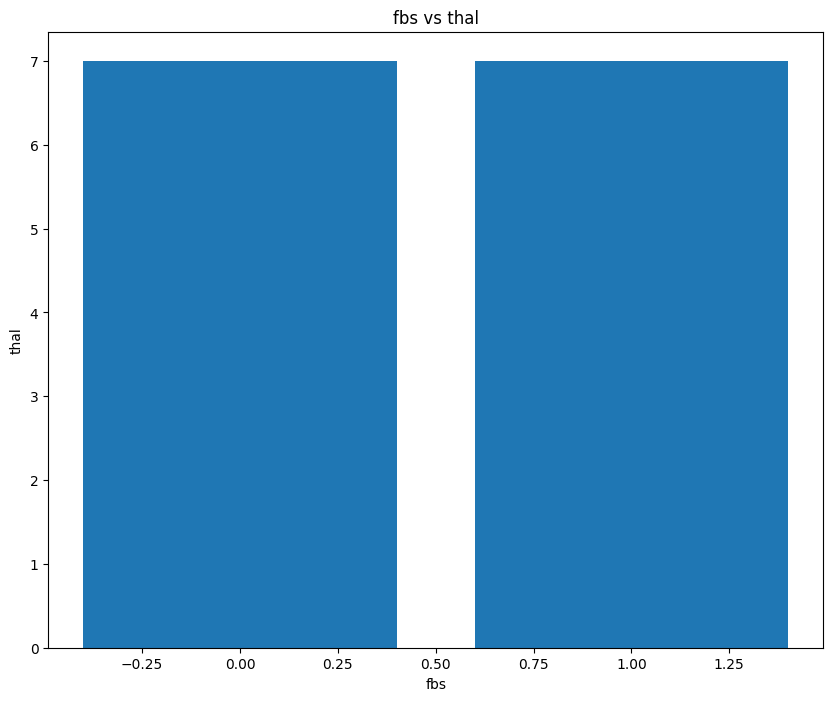

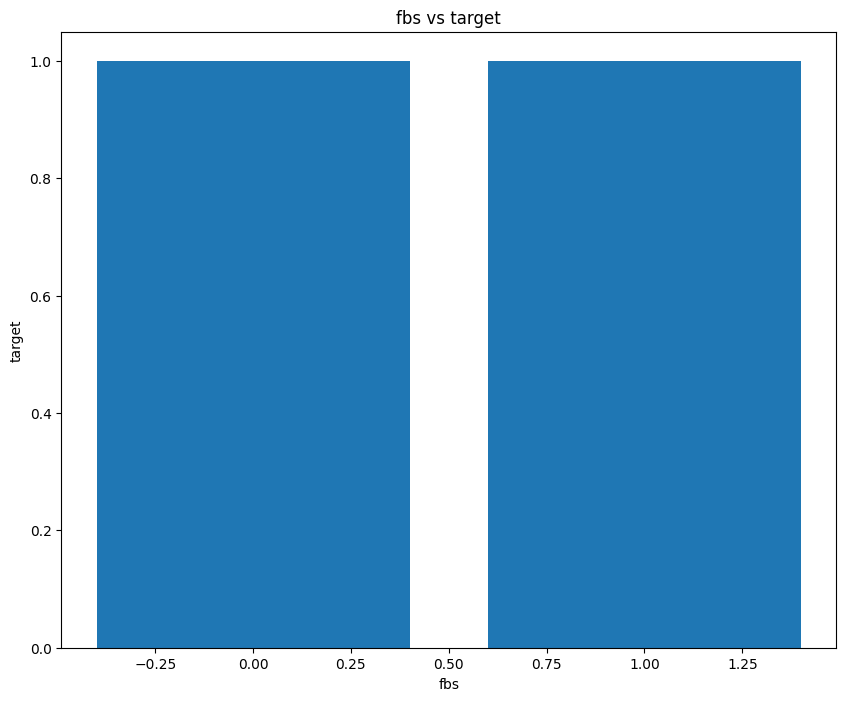

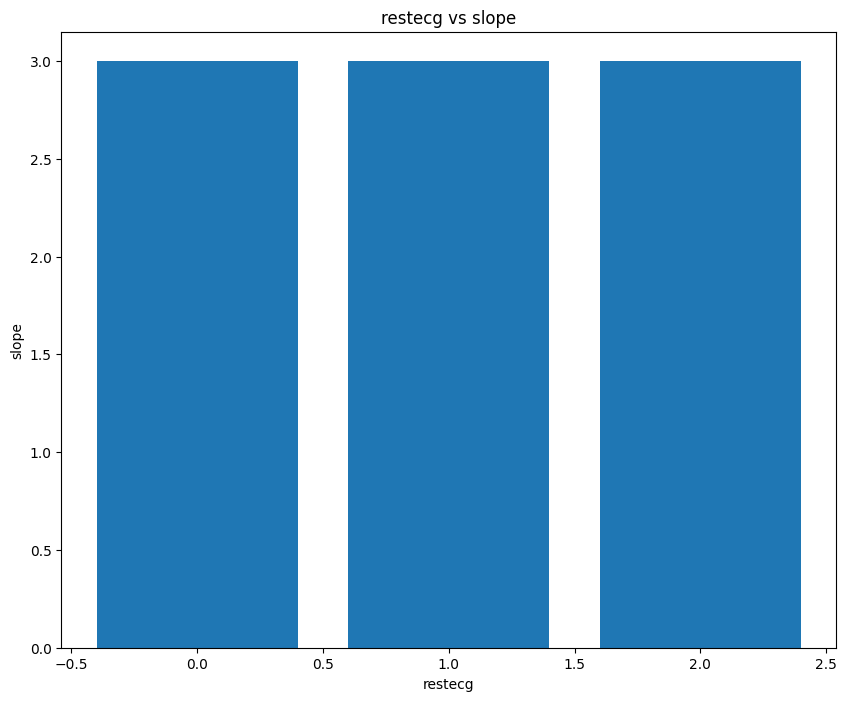

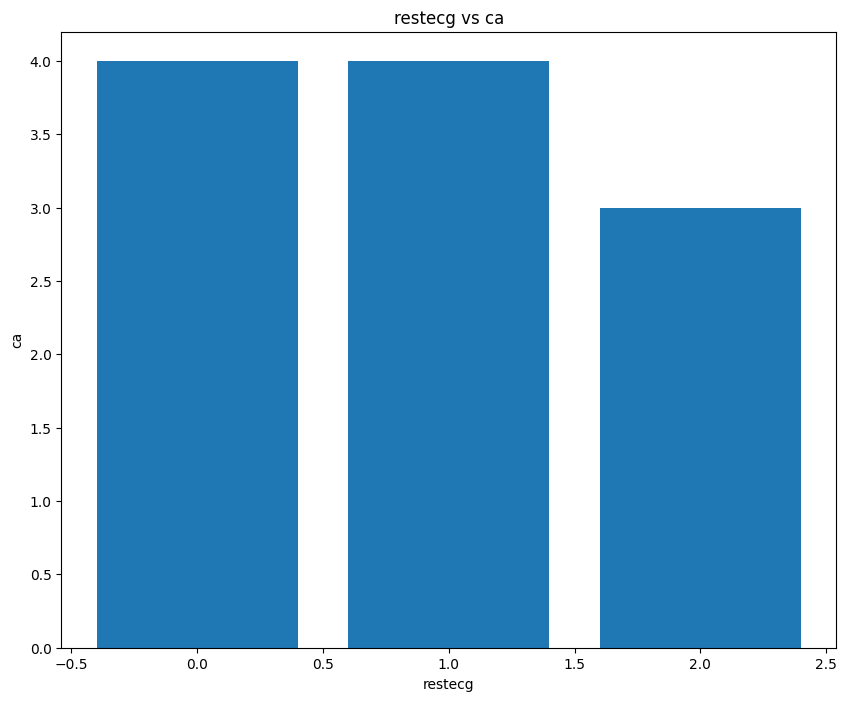

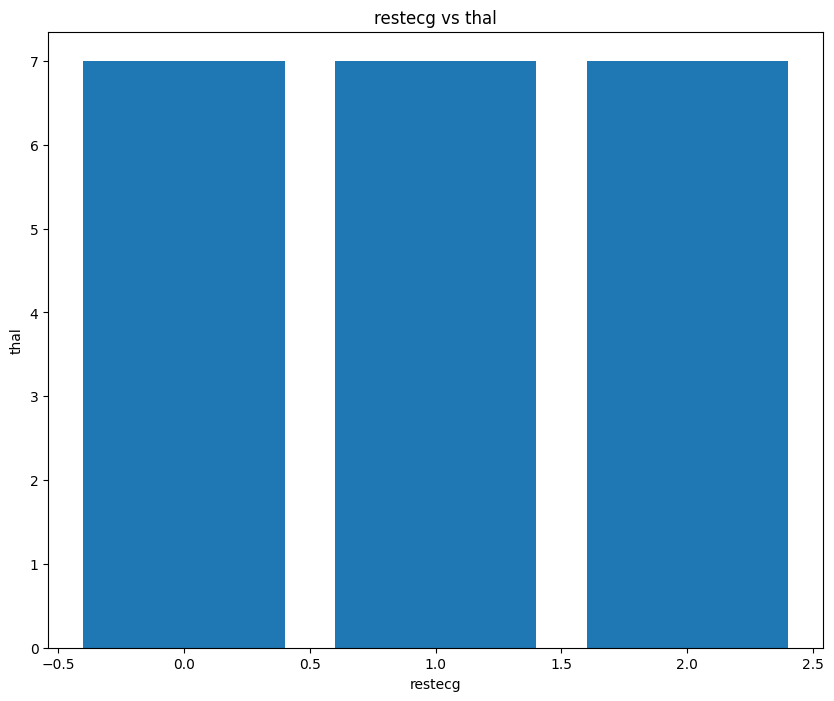

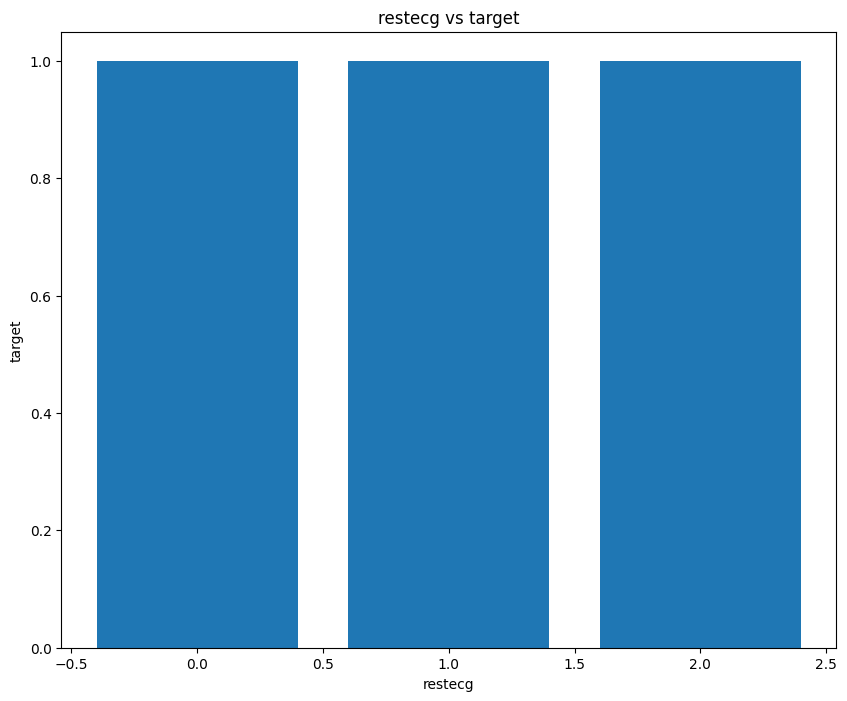

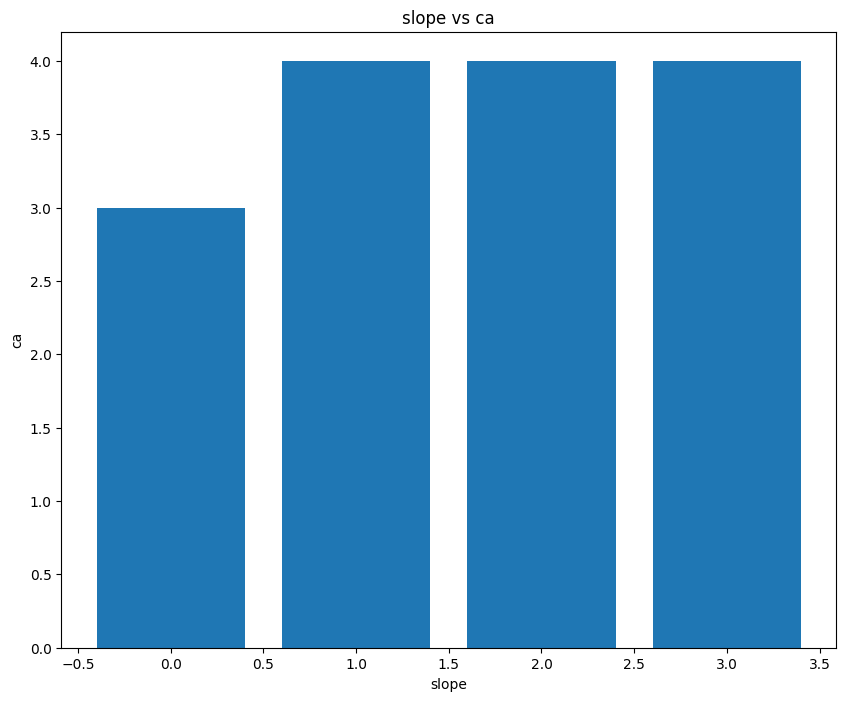

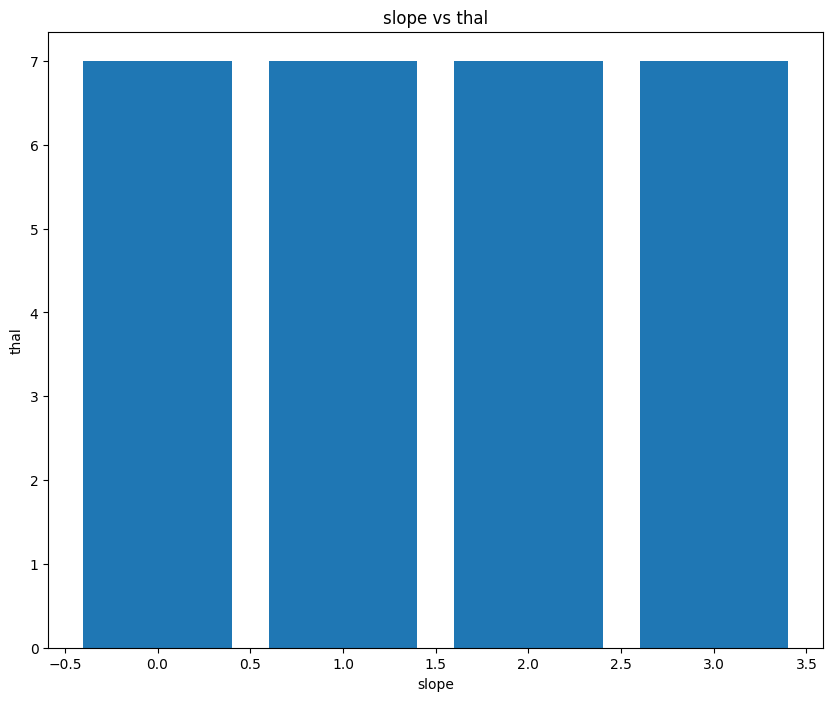

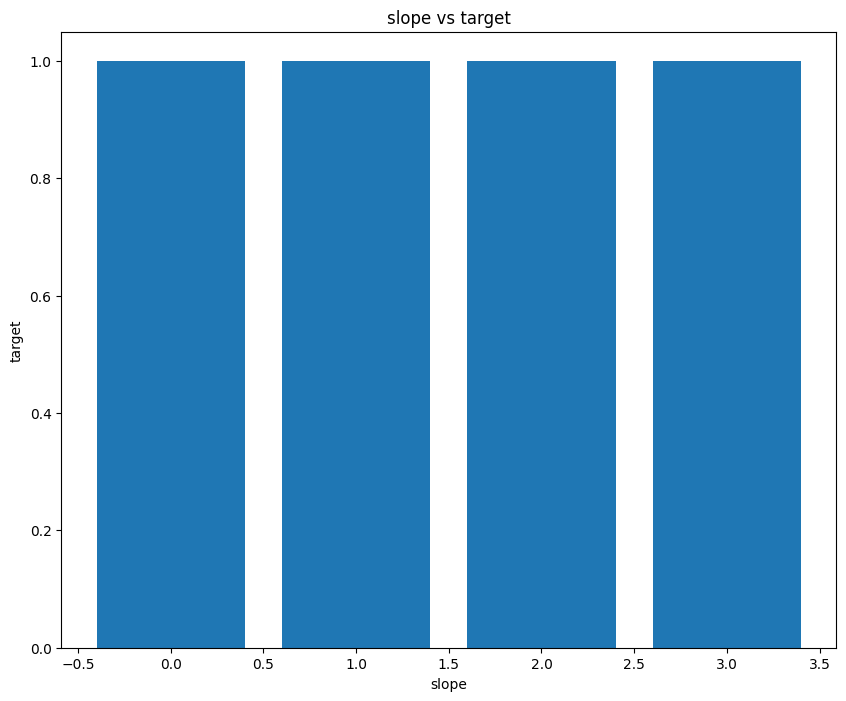

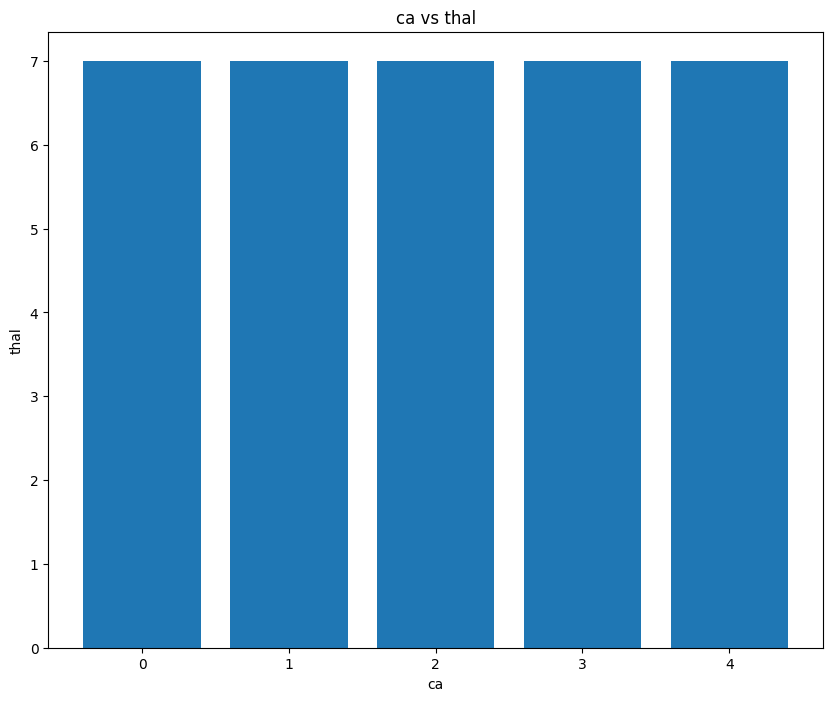

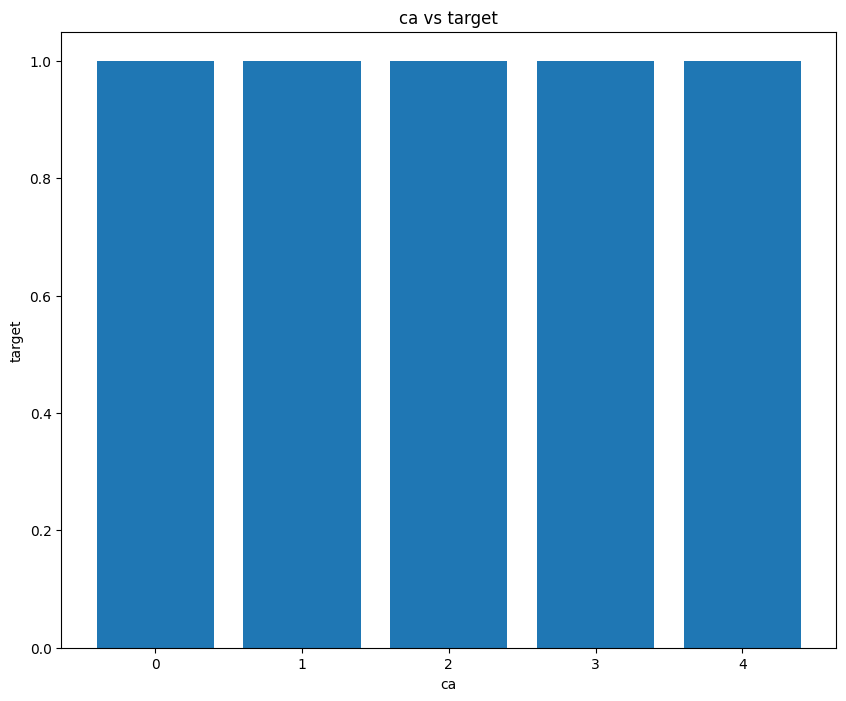

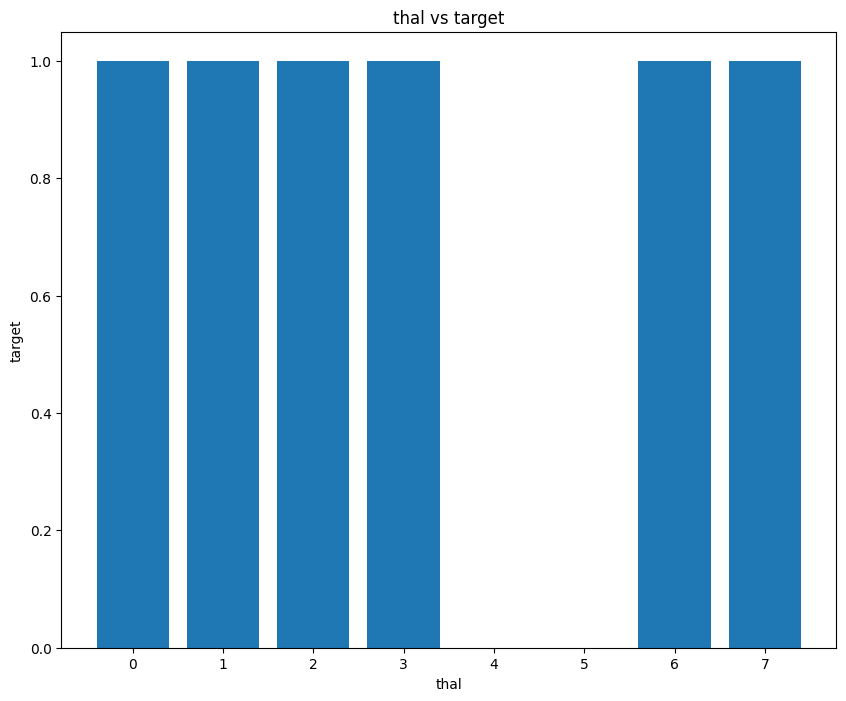

In [27]:
plot_bar(data)

In [51]:
# hist for all categorical values using seaborn
import seaborn as sns
def plot_hist(data):
  numeric_cols=['sex','cp','fbs','restecg','slope','ca','thal','target']
  
  for i,col1 in enumerate(numeric_cols):
    for j,col2 in enumerate(numeric_cols):
      if i<j:
        fig,ax =plt.subplots(figsize=(10,8))
        sns.histplot(data=data,x=col1,y=col2,hue=data.target)
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.set_title(f"{col1} vs {col2}")
        plt.show()

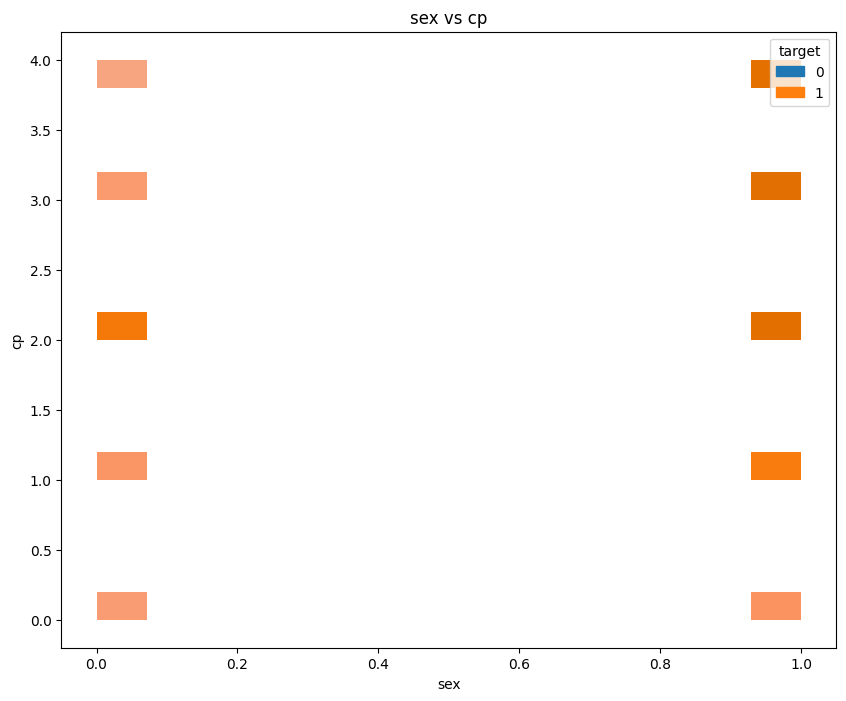

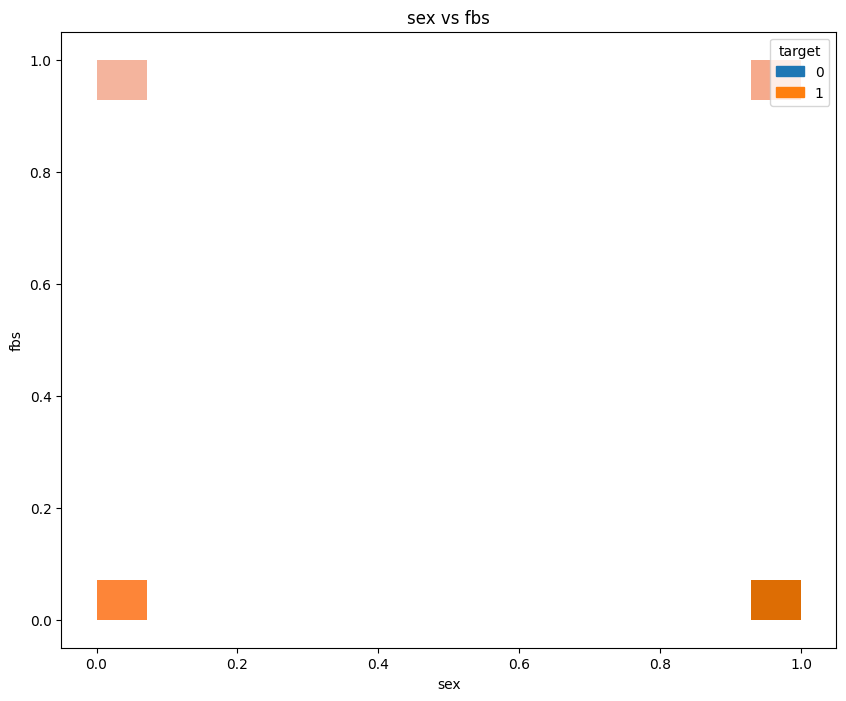

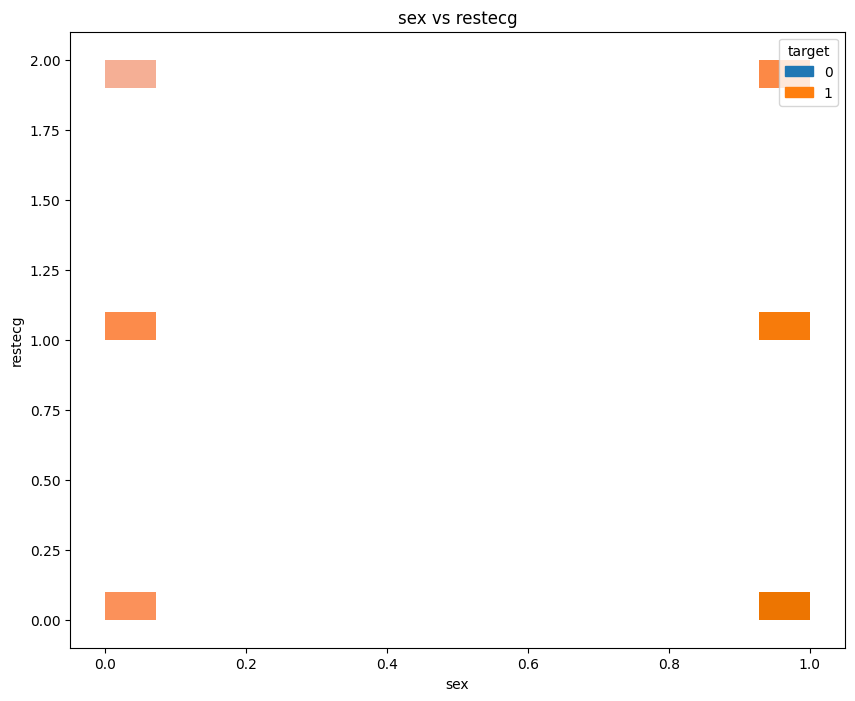

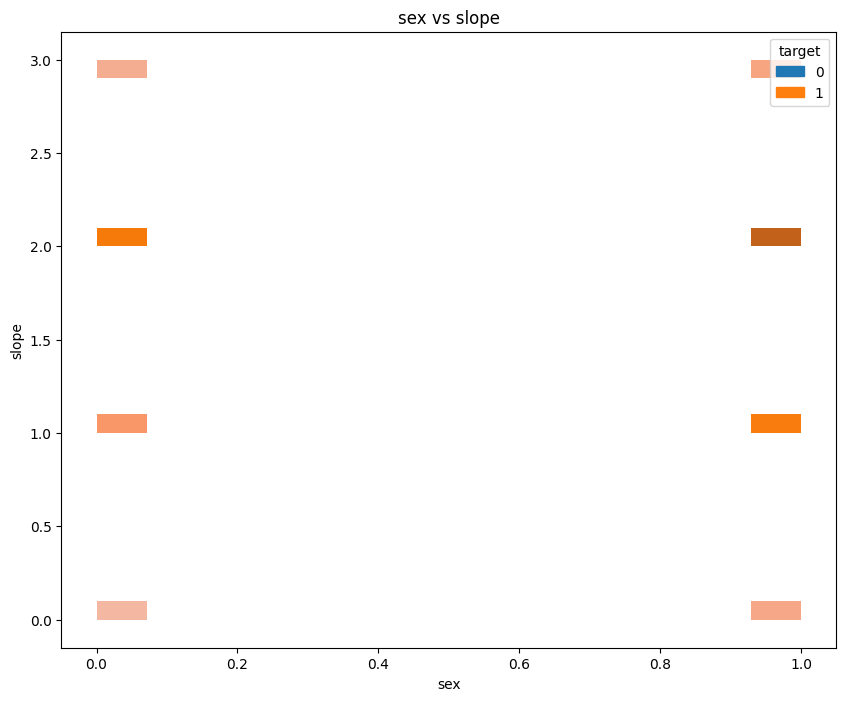

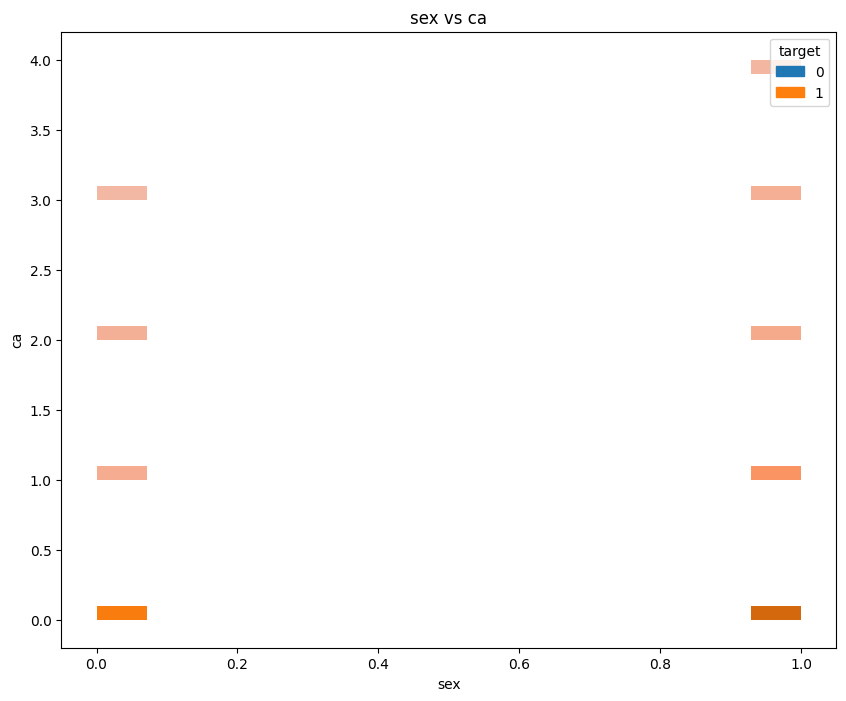

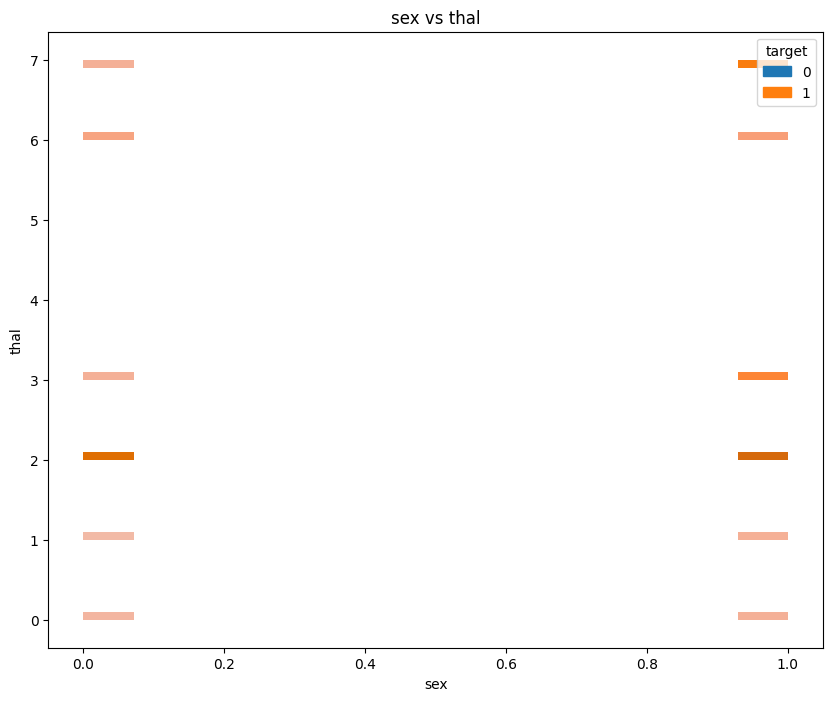

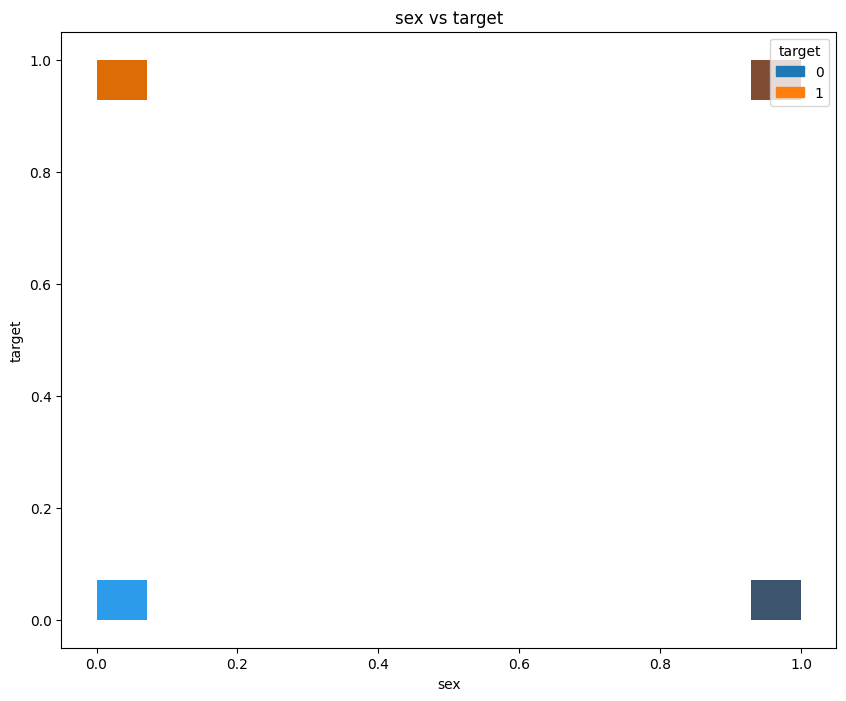

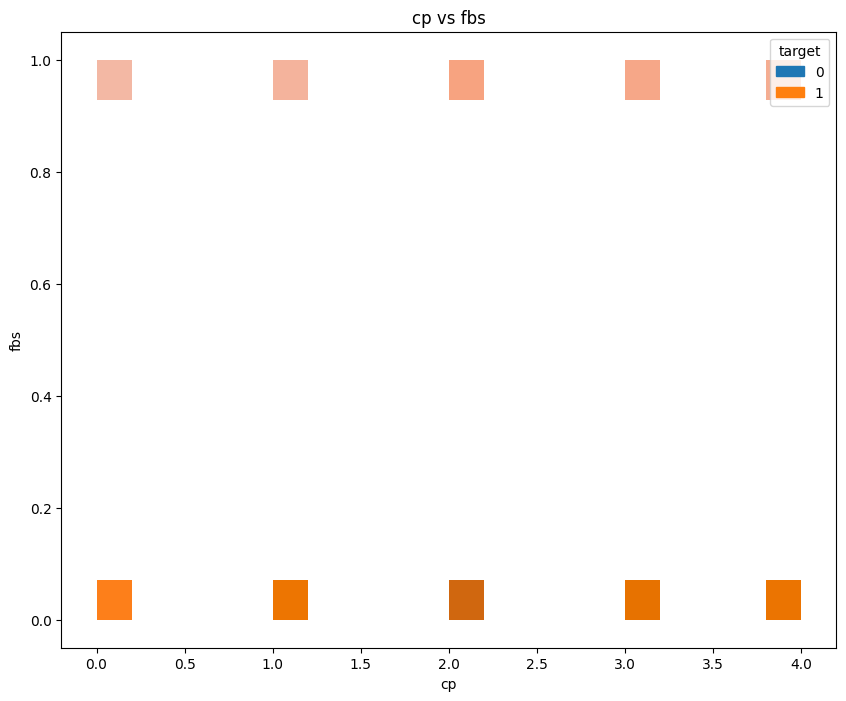

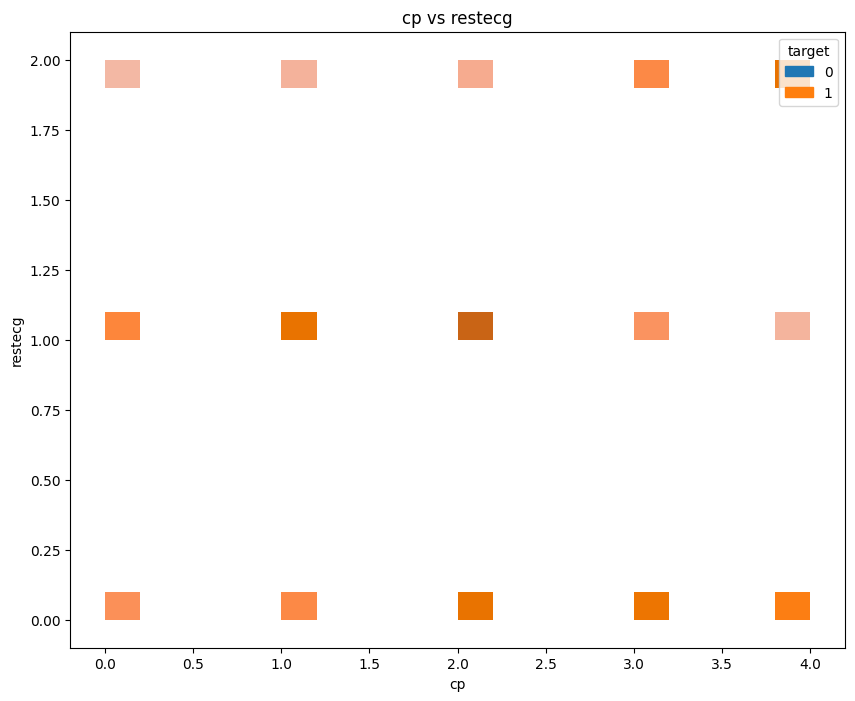

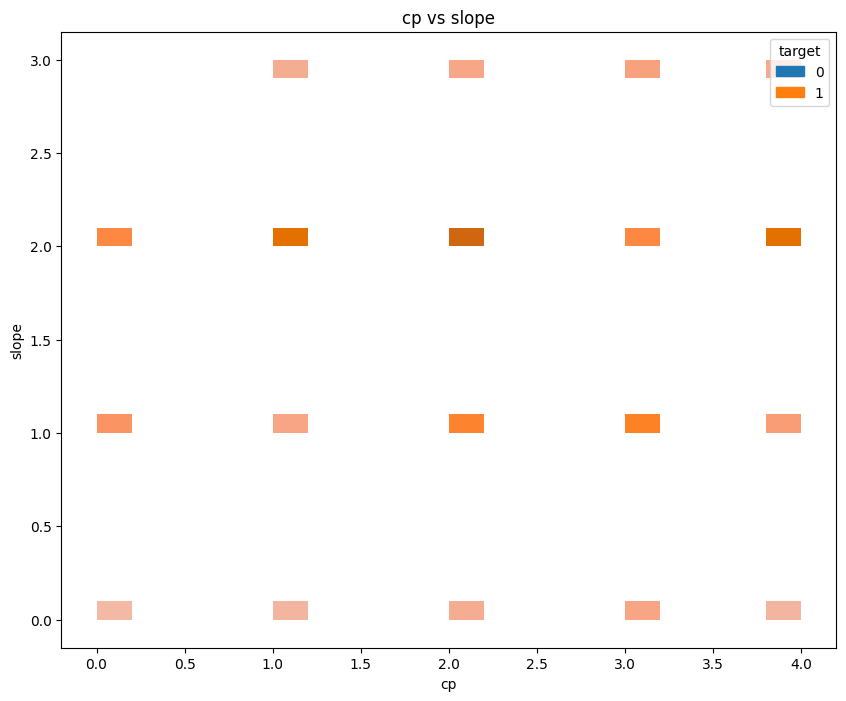

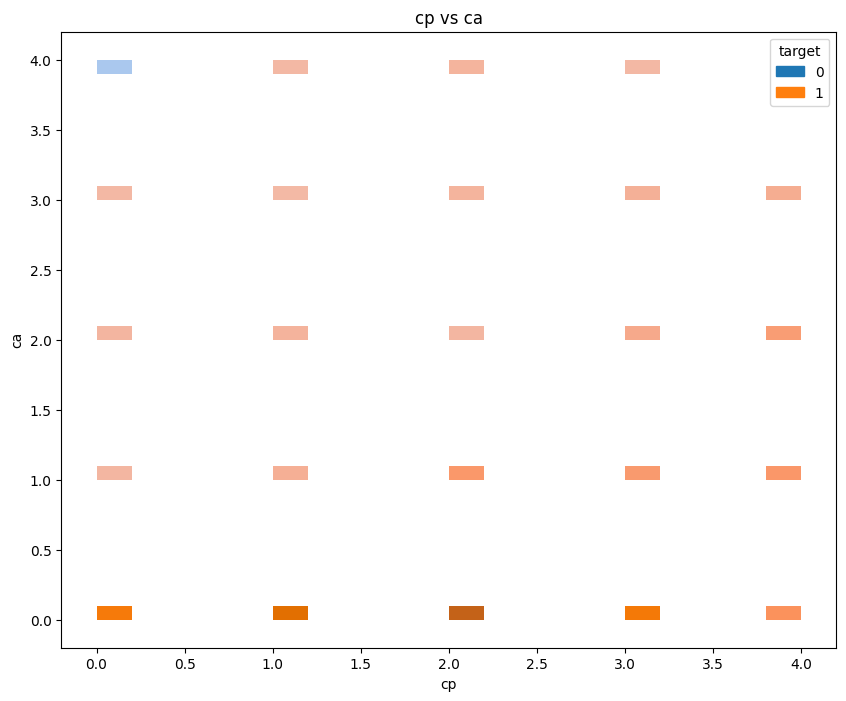

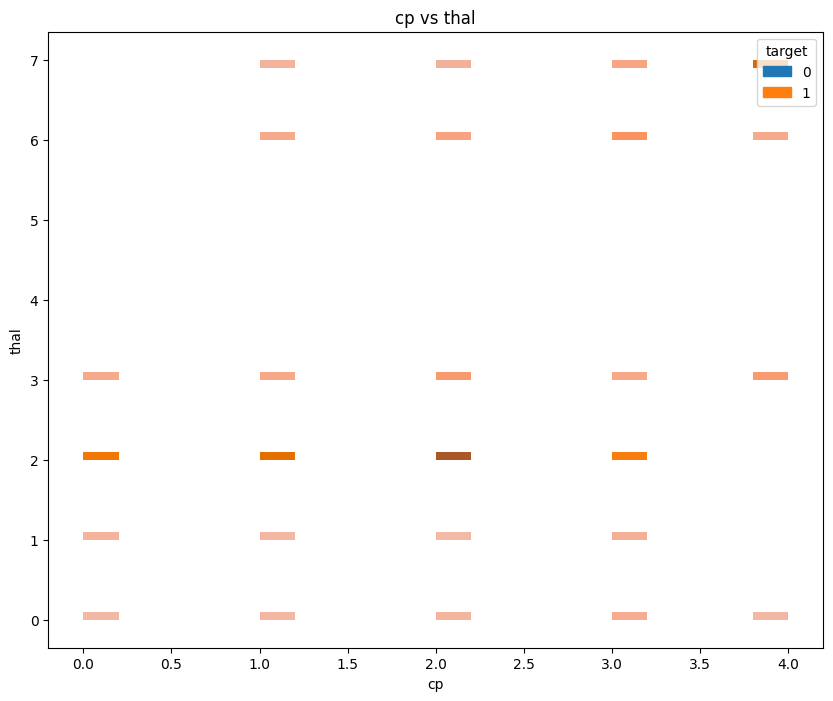

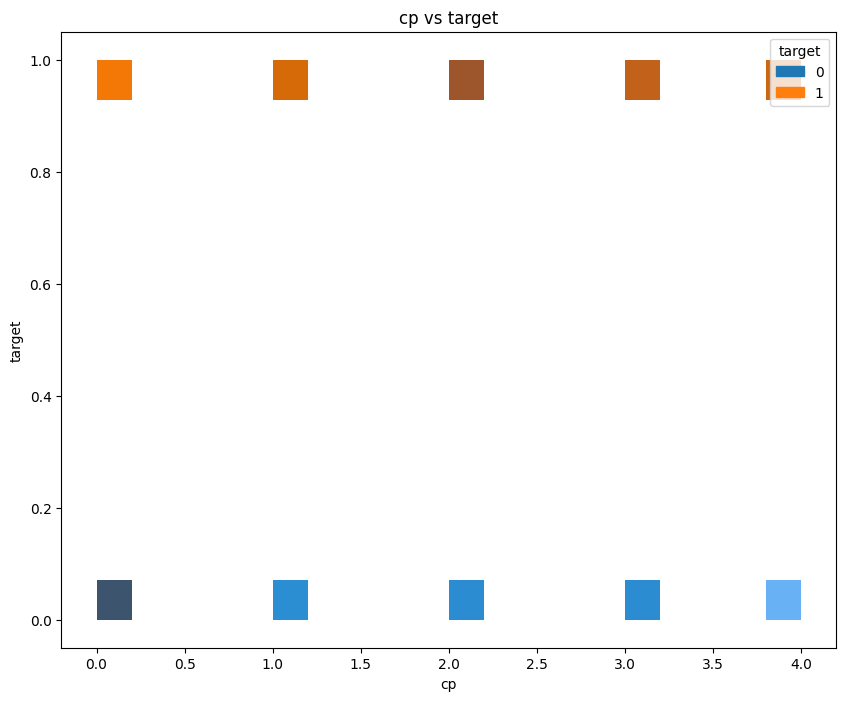

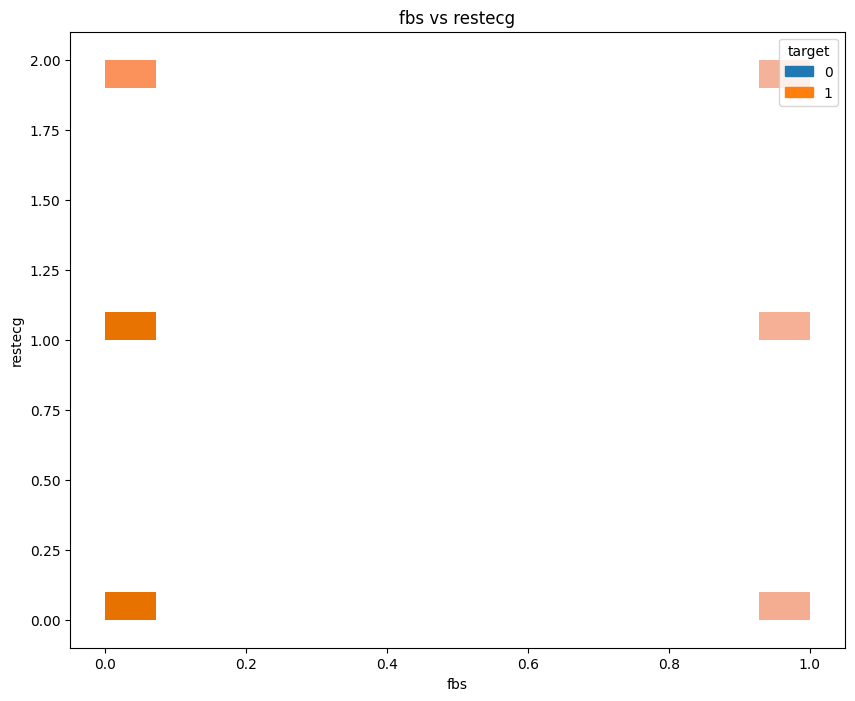

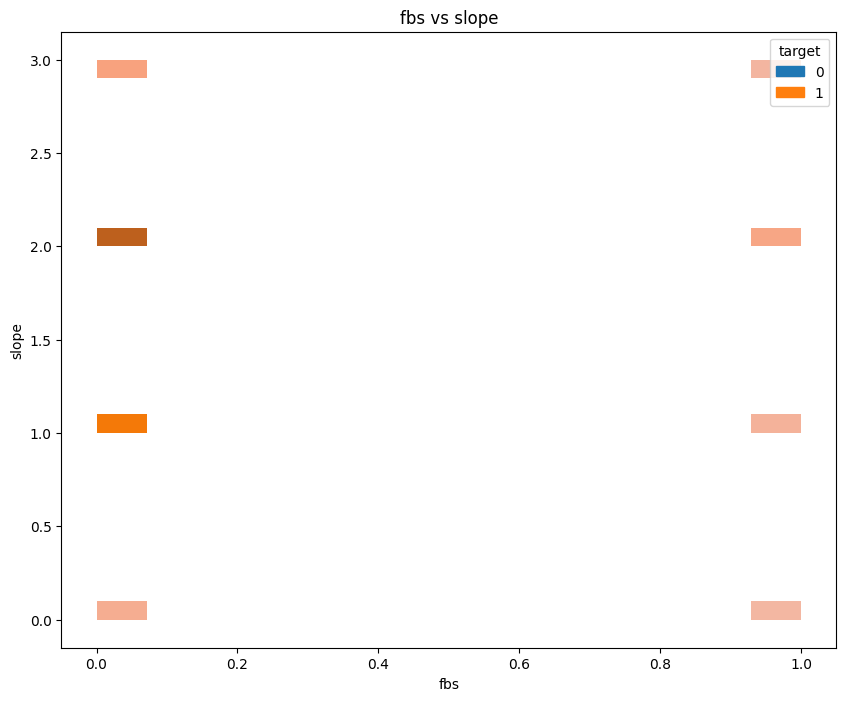

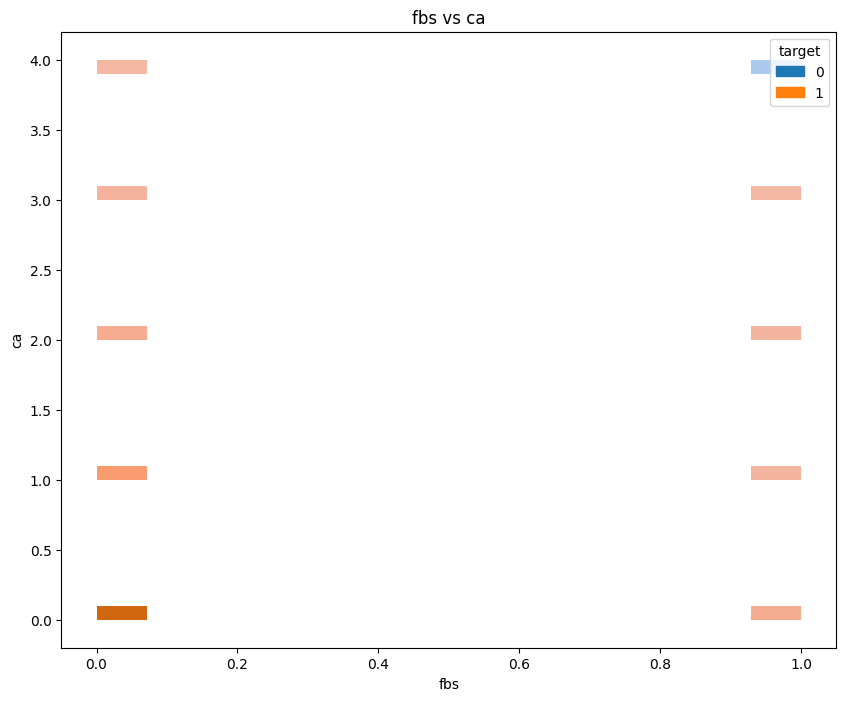

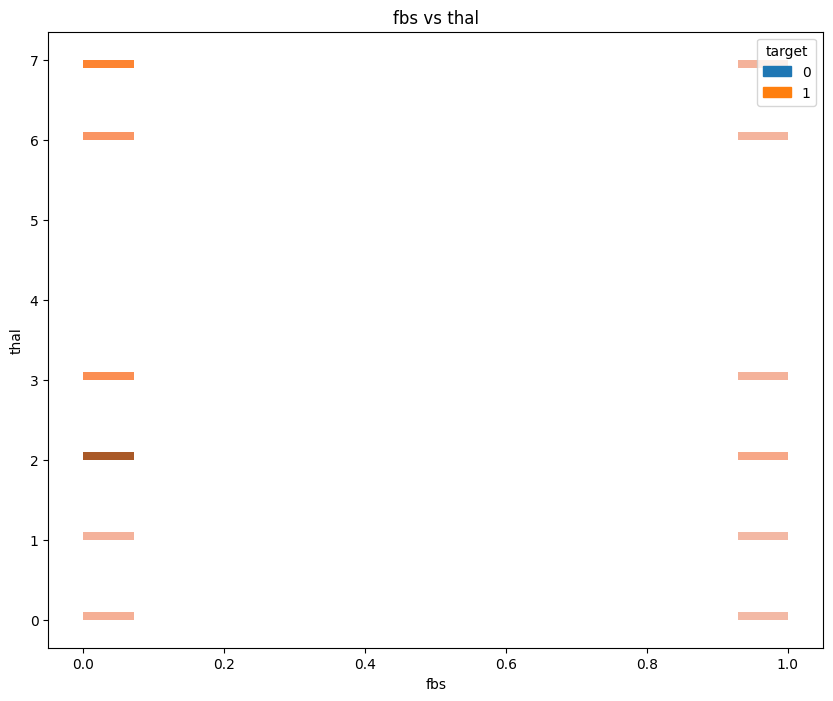

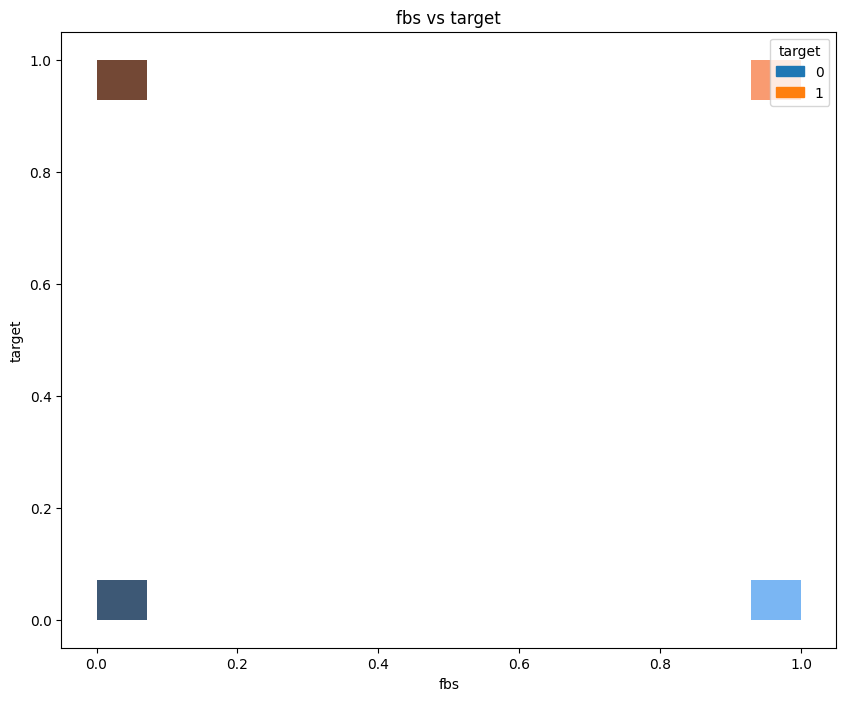

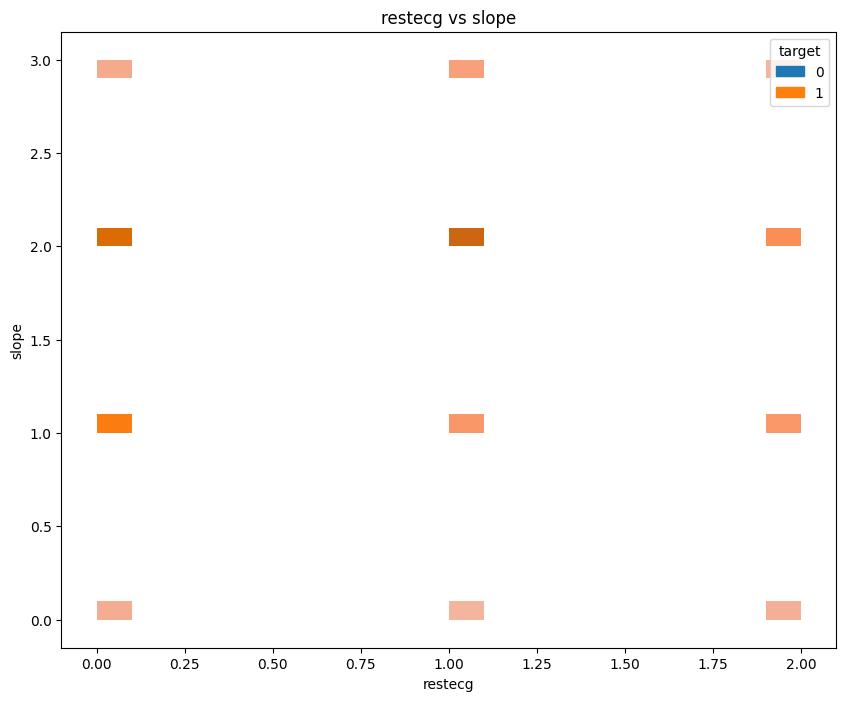

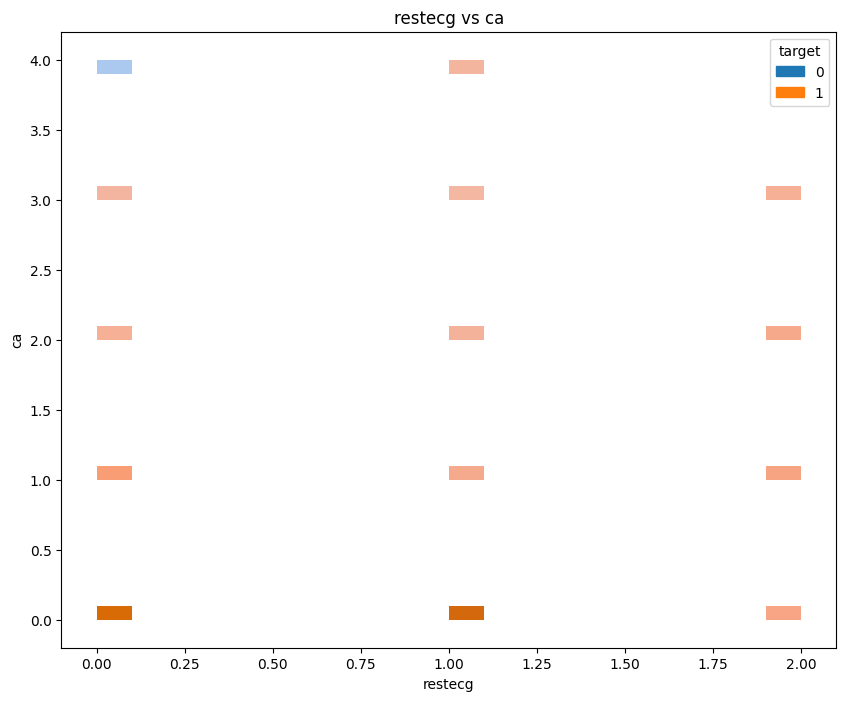

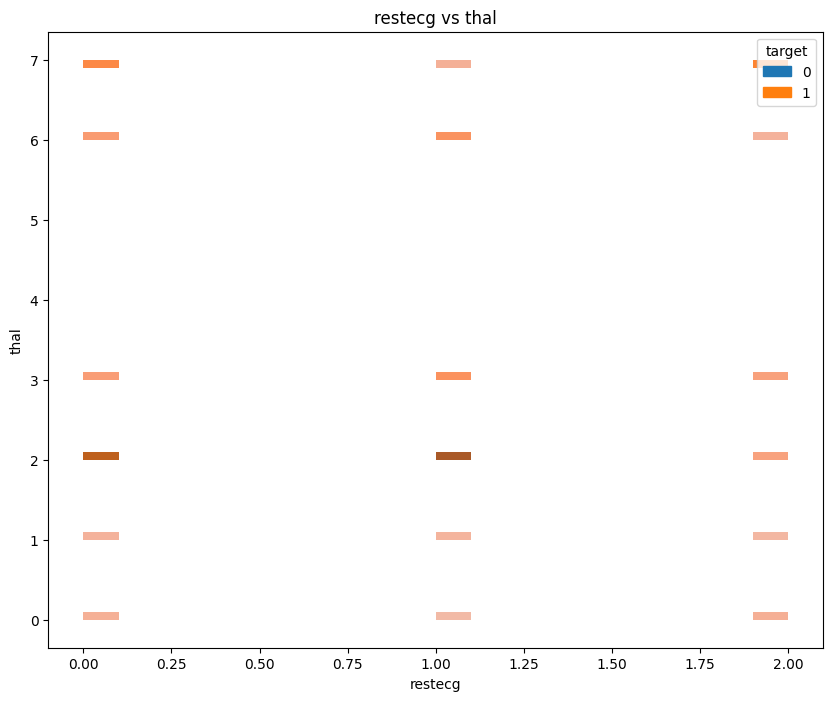

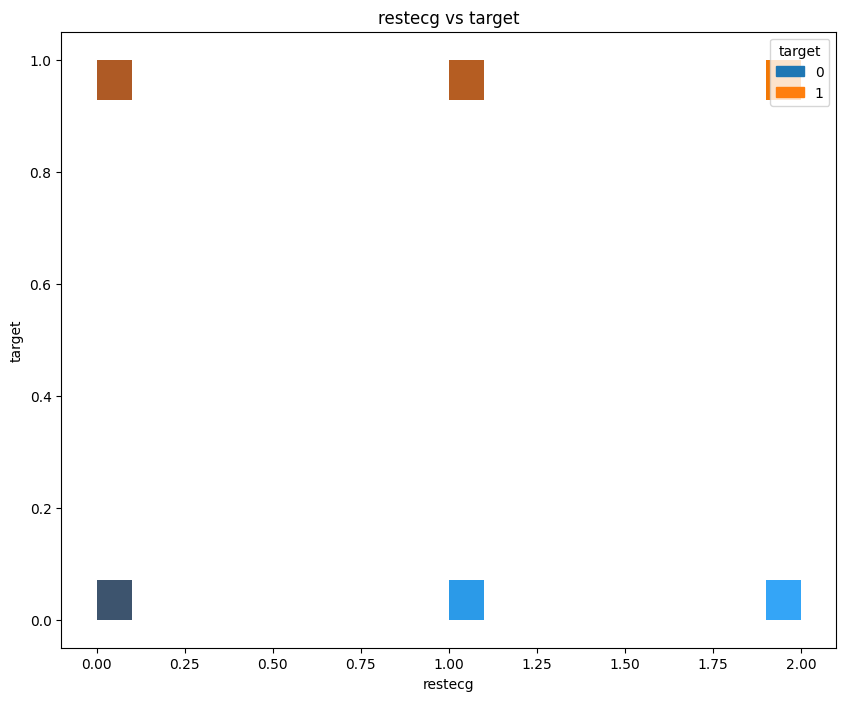

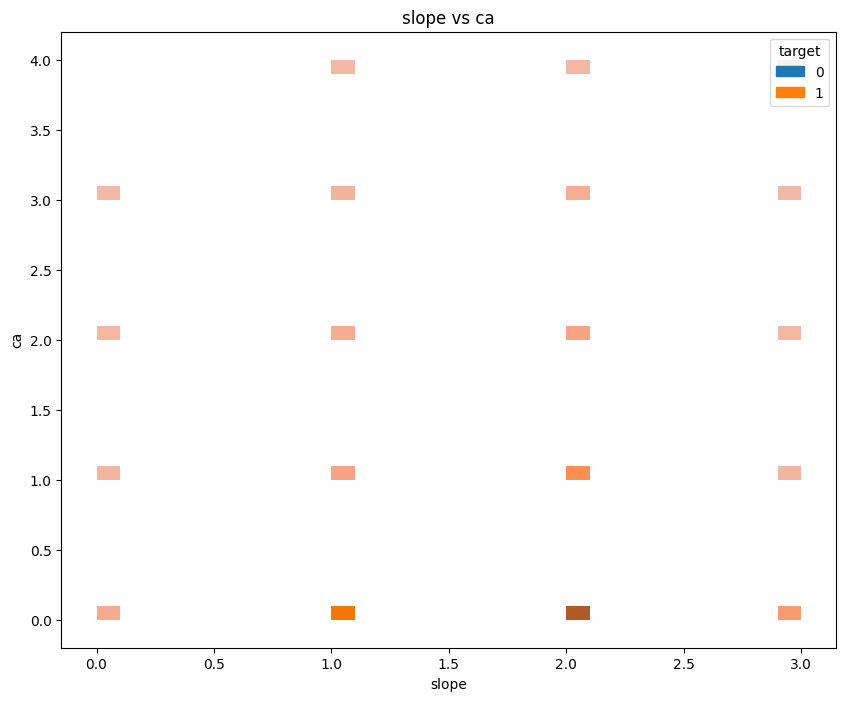

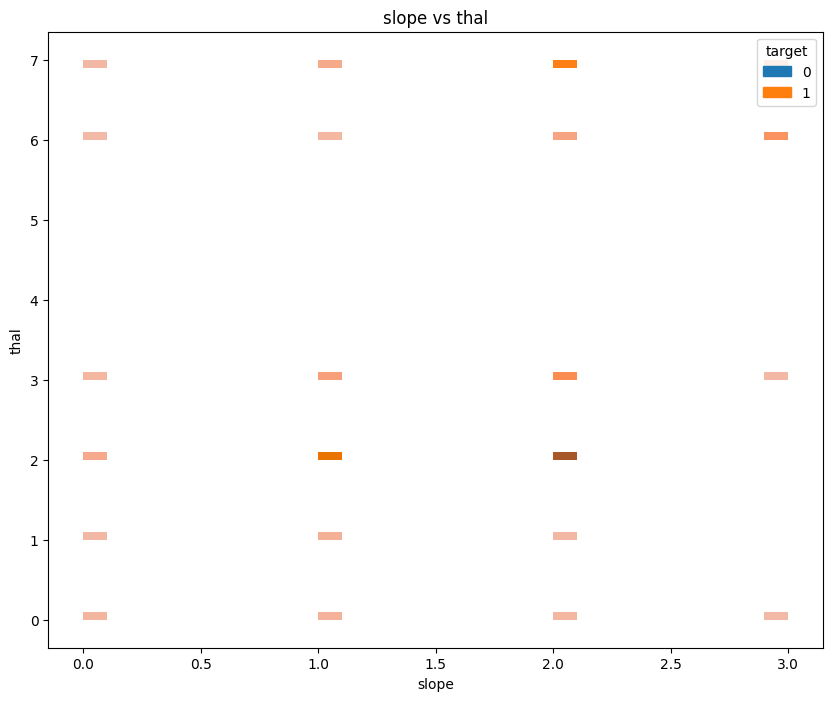

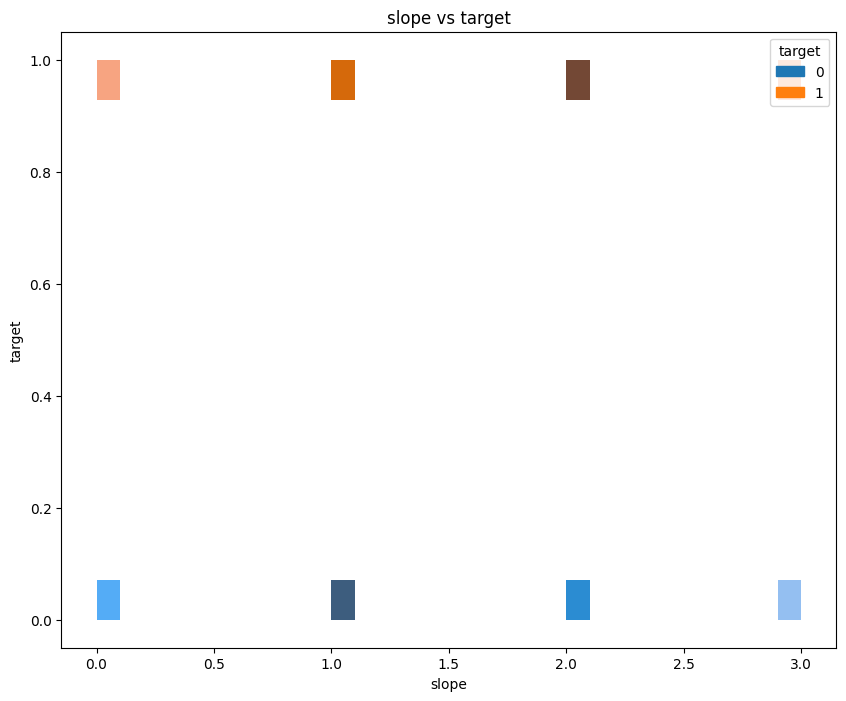

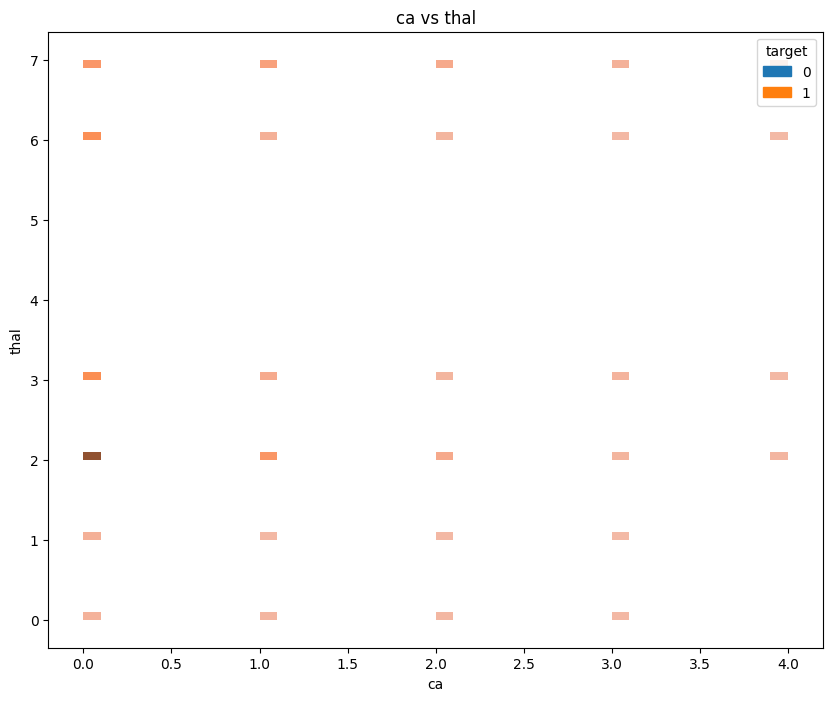

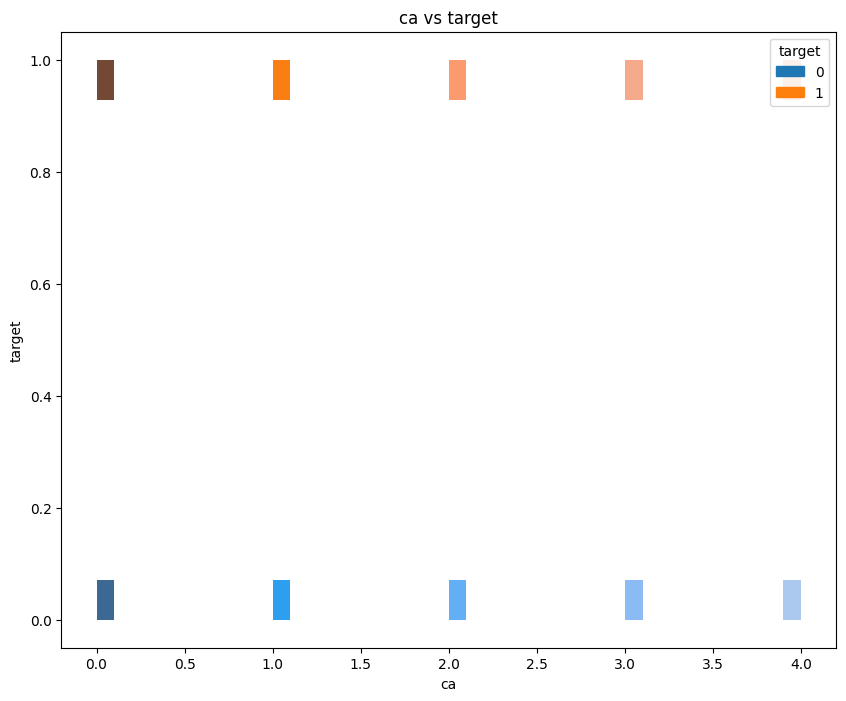

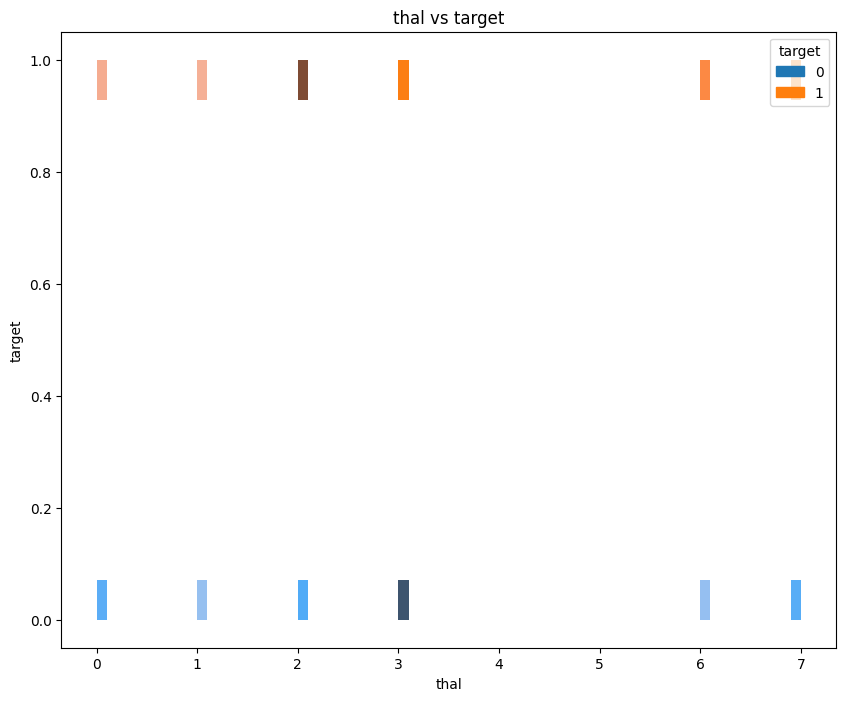

In [52]:
plot_hist(data)

In [61]:
import plotly.graph_objects as go
num_cols=['age','trestbps','chol','thalach','oldpeak']
cat_cols=['sex','cp','fbs','restecg','slope','ca','thal','target']

for col in num_cols:
  fig=px.histogram(data,x=col,nbins=20,title=f"Distribution plot of{col}")
  fig.add_trace(go.Violin(x=data[col],name="Density Curve",line_color="blue",fillcolor="lightblue",opacity=0.6))
  fig.show()

for col in cat_cols:
  fig=px.histogram(data,x=col,nbins=20,title=f"Distribution plot of{col}")
  fig.add_trace(go.Violin(x=data[col],name="Density Curve",line_color="blue",fillcolor="lightblue",opacity=0.6))
  fig.show()

